### Phase-Three Project Submission

* Student Name: Wes Swager
* Student Pace: Full Time
* Scheduled Project Review Date/Time: Tuesday, April 20, 2021, 4:00pm CST
* Instructor Name: Claude Fried

 # <center><font color = 'purple'> San Bay Communications </center></font>

![bridge_logo.jpg](images/bridge_logo.jpg)

# Overview

Analyze data associated with telecommunications customers in the San Francisco Bay area and predict churn using classification modeling.

# Business Problem

San Bay Tel is a new telecommunications startup looking to establish themselves in the San Francisco Bay area. 

San Bay Tel's main priority is retention while they establish themselves in the market.  For this reason they have requested a model predicting the likelihood of customer churn.

# Contents
* **[Packages](#packages)**
* **[Data](#data)**
* **[Data Cleaning](#data_cleaning)**
* **[Data Exploration](#data_exploration)**
    * **[Feature Exploration](#feature_exploration)**
        * **[Account Length](#account_length)**
        * **[International Plan](#international_plan)**
        * **[Voicemail Plan](#voicemail_plan)**
        * **[Number of Voicemail Message](#number_of_voicemail_messages)**
        * **[Day Minutes](#day_minutes)**
        * **[Day Calls](#day_calls)**
        * **[Day Charges](#day_charges)**
        * **[Evening Minutes](#evening_minutes)**
        * **[Evening Calls](#evening_calls)**
        * **[Evening Charges](#evening_charges)**
        * **[Night Minutes](#night_minutes)**
        * **[Night Calls](#night_calls)**
        * **[Night Charges](#night_charges)**
        * **[International Minutes](#international_minutes)**
        * **[International Calls](#international_calls)**
        * **[International Charges](#international_charges)**
        * **[Customer Service Calls](#customer_service_calls)**
    * **[Correlation](#correlation)**
* **[Feature Engineering](#feature_engineering)**
    * **[Engineered Features](#engineered_features)**
        * **[Total Minutes](#total_minutes)**
        * **[Total Calls](#total_calls)**
        * **[Total Charges](#total_charges)**
        * **[Average Minutes per Call](#minutes_per_call)**
        * **[Average Charges per Call](#charges_per_call)**
        * **[Average Charges per Minute](#charges_per_minute)**
        * **[International Minutes Percent of Total Minutes](#international_minutes_per_total)**
        * **[International Calls Percent of Total Calls](#international_calls_per_total)**
        * **[International Charges Percent of Total Minutes](#international_charges_per_total)**
    * **[Correlation of Engineered Features](#correlation_engineered_features)**
* **[Train/Test Split and Data Normalization](#train_test_split)**
* **[Evaluation Metrics](#evaluation_metrics)**
* **[Models](#models)**
    * **[Logistic Regression](#logistic_regression)**
    * **[Ada Boost](#adaboost)**
    * **[K Neighbors](#kneighbors)**
    * **[Decision Trees](#decision_trees)**
    * **[Extra Trees](#extra_trees)**
    * **[Gradient Boosting](#gradient_boosting)**
    * **[Random Forest](#random_forest)**
    * **[XG Boost](#xgboost)**
* **[Modeling Conclusion](#modeling_conclusion)**
    * **[Feature Importance](#feature_importance)**
        * **[XG Boost](#feature_importance_xgb)**
        * **[Ada Boost](#feature_importance_ada)**
    * **[Exploring Additional Data Transformation](#additional_data_transformation)**
        * **[XG Boost](#additional_data_transformation_xgb)**
        * **[Ada Boost](#additional_data_transformation_ada)**
* **[Conclusions](#conclusions)**
    * **[Minutes](#conclusions_minutes)**
    * **[Customer Service Calls](#conclusions_customer_service_calls)**
    * **[Voicemails](#conclusions_voicemails)**
* **[Next Steps](#next_steps)**

<a id = 'packages'></a>
# Packages

In [1]:
# Import Pandas for Dataframes

import pandas as pd
from IPython.display import display

# Import Numpy and Math for mathematical functions

import numpy as np

import math

# Import statsmodels and Scipy Stats for statistical functions

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import scipy.stats as stats

# Import Matplotlib and Seaborn for visualizations

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = 'darkgrid', context = 'talk')

# Import Scikit-learn for modeling

import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE

import xgboost as xgb

from sklearn.pipeline import Pipeline

<a id = 'data'></a>
# Data

### Churn in Telecom Data

Data associated telecommunications customers from the San Francisco Bay area, area codes:

* **415** City of San Francisco, Marin County, and the northeast corner of San Mateo County
* **408** City of San Jose, Santa Clara County, and northern Santa Cruz County
* **510** Contra Costa County and western Alameda County

*Data sourced from* [Churn in Telecom's dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset/code) *by* [david_becks](https://www.kaggle.com/becksddf)

In [2]:
# Import Churn in Telecom dataset

cit = pd.read_csv(r'C:\Users\westi\Documents\github\churn_in_telecom\data\churn_in_telecom.csv')
cit.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Check initial cit data types and row counts
# Check intitial ccit for NA values

cit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

<a id = 'data_cleaning'></a>
# Data Cleaning

### Remove Features

In [4]:
# Remove phone number, area code, and state from cit

# Individual phone numbers will be unique to each customer

# Only three area codes are represented, all within the same defined geographic area

# State, indicates the customer's origin state, however, the current assumption is 
# that they reside in the defined geographic area

cit = cit.drop(['phone number', 'area code', 'state'], axis = 1)

### Label Encoding for Catergorical Variables

In [5]:
# Define categorical variables

categories = [key for key in dict(cit.dtypes) 
              if dict(cit.dtypes)[key] in ['bool', 'object']]
categories

['international plan', 'voice mail plan', 'churn']

In [6]:
print(cit['international plan'].unique())
print(cit['voice mail plan'].unique())
print(cit['churn'].unique())

['no' 'yes']
['yes' 'no']
[False  True]


In [7]:
# Label encode categories
# All categories are True/False, so label encoding will be 1/0
# Further Encoding not necessary

encoder = LabelEncoder()
for x in categories:
    encoder.fit(cit[x])
    cit[x] = encoder.transform(cit[x])

<a id = 'data_exploration'></a>
# Data Exploration

In [8]:
#cit initial mean, standard deviation, and five-point statistics

cit.describe()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


Total Churn: 483 

Percentage of Churn: 14.49 % 



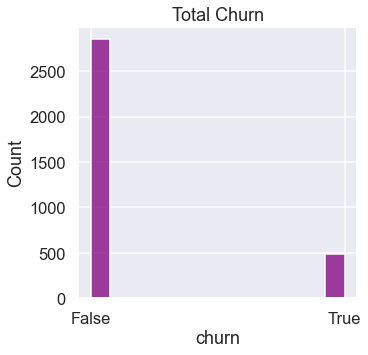

In [9]:
# Calculate total churn amongst all customers

churn = (cit['churn'] == 1).sum()
print('Total Churn:', churn, '\n')

# Calculate percentage of churn amongst all customers

churn_percent = (churn/len(cit))
print('Percentage of Churn:', ((churn/len(cit)) * 100).round(2), "%", '\n')

# Visualize total churn

f, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data = cit, ax = ax, stat = 'count', multiple = 'stack',
             x = 'churn', kde = False, color = 'purple',
                 element = 'bars', legend = False)
ax.set_title('Total Churn')
ax.set_xticks([0, 1])
ax.set_xticklabels(['False', 'True']);

<a id = 'feature exploration'></a>
## Feature Exploration

### Functions

In [10]:
def int_feature_v_churn(feature, title, xlabel):
    f, ax = plt.subplots(figsize=(10, 10))
    sns.set_palette(sns.color_palette(['plum', 'purple']))
    sns.histplot(data = cit, ax = ax, stat = 'count', multiple = 'stack',
                 x = feature, kde = False, hue = 'churn',
                 element = 'bars', legend = True)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.legend(title = 'Churn', labels = ['True', 'False'],
             bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0);

In [11]:
def category_feature_v_churn(feature, title, xlabel):
    f, ax = plt.subplots(figsize=(10, 10))
    sns.set_palette(sns.color_palette(['plum', 'purple']))
    sns.histplot(data = cit, ax = ax, stat = 'count', multiple = 'stack',
                 x = feature, kde = False, hue = 'churn',
                 element = 'bars', legend = True)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['False', 'True'])
    ax.legend(title = 'Churn', labels = ['True', 'False'],
             bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0);

<a id = 'account_length'></a>
### Account Length

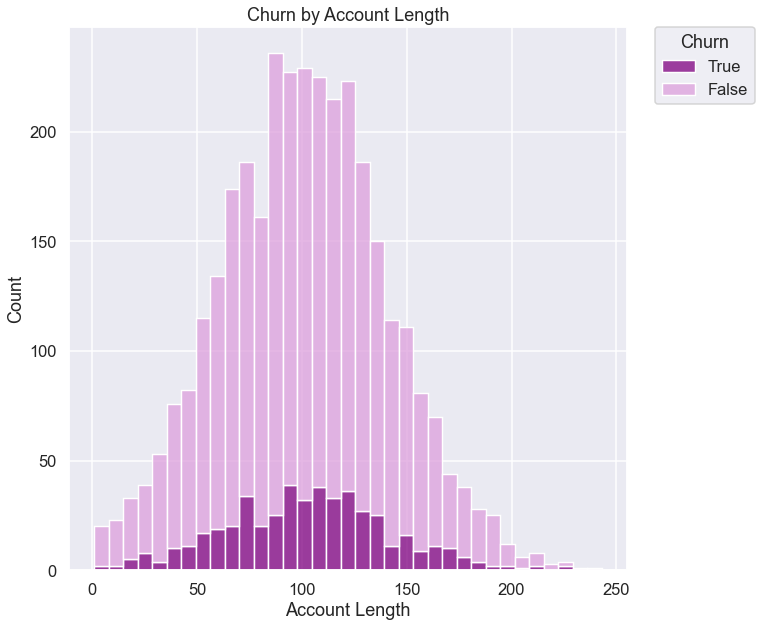

In [12]:
# Visualize churn by account length

int_feature_v_churn('account length', 
                    'Churn by Account Length',
                    'Account Length')

<a id = 'international_plan'></a>
### International Plan

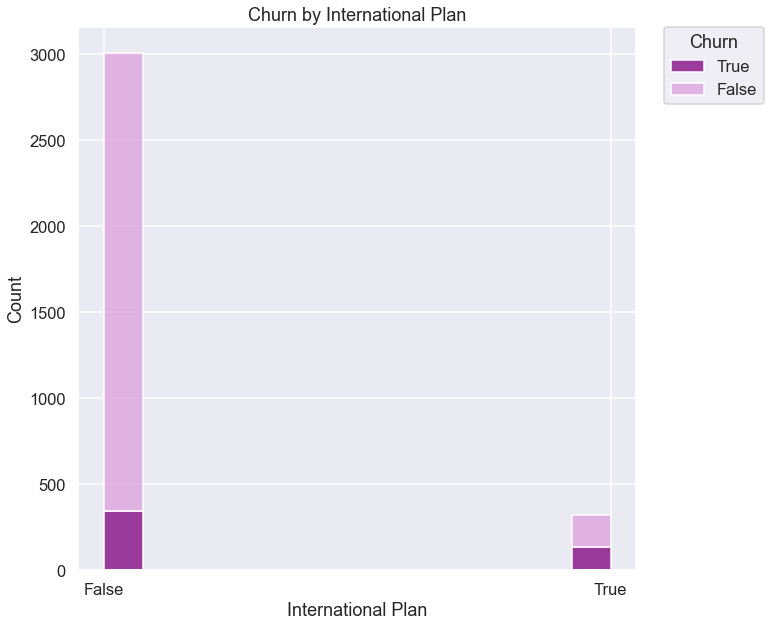

In [13]:
# Visualize churn by international plan

category_feature_v_churn('international plan',
                        'Churn by International Plan',
                        'International Plan')

<a id = 'voicemail_plan'></a>
### Voicemail Plan

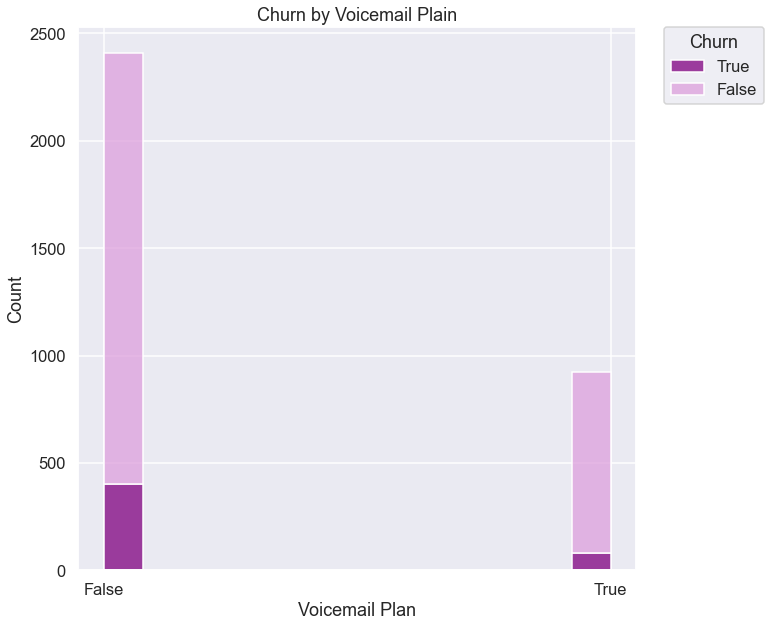

In [14]:
category_feature_v_churn('voice mail plan',
                        'Churn by Voicemail Plain',
                        'Voicemail Plan')

<a id = 'number_of_voicemail_messages'></a>
### Number of Voicemail Messages

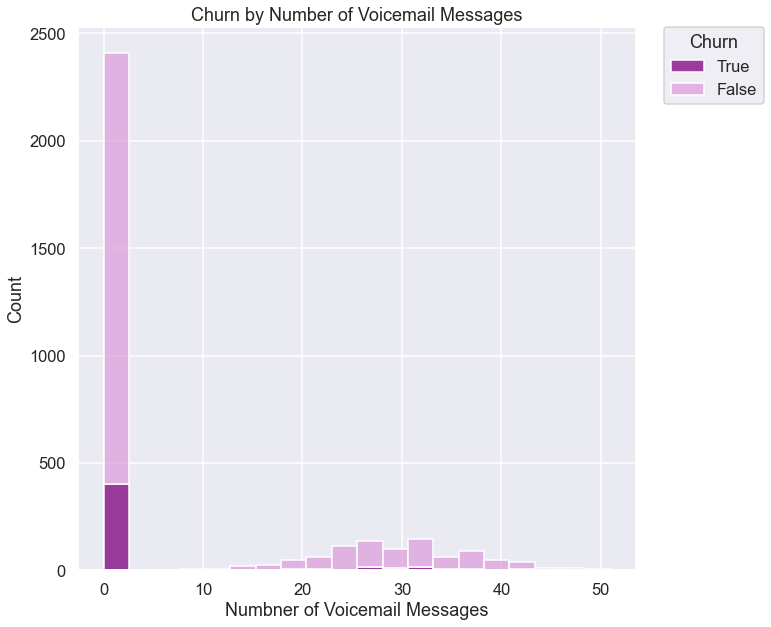

In [15]:
int_feature_v_churn('number vmail messages',
                   'Churn by Number of Voicemail Messages',
                   'Numbner of Voicemail Messages')

<a id = 'day_minutes'></a>
### Day Minutes

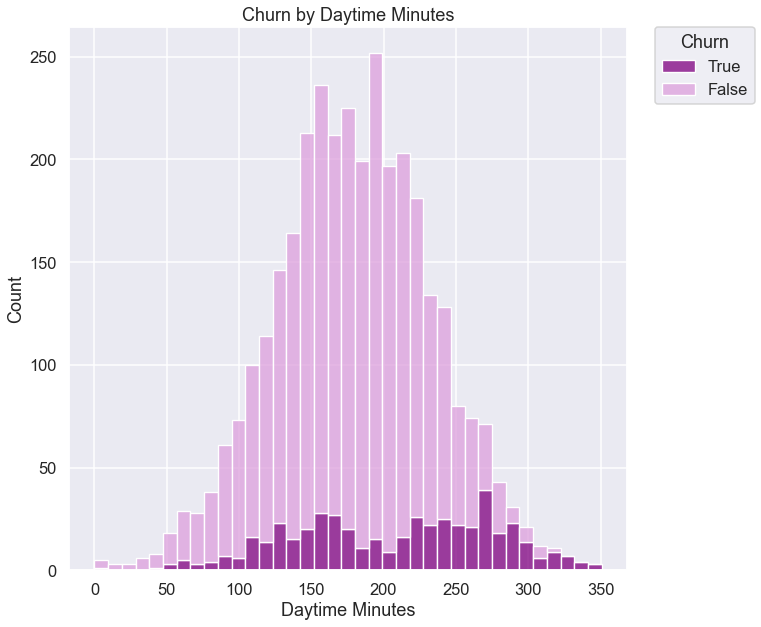

In [16]:
int_feature_v_churn('total day minutes',
                   'Churn by Daytime Minutes',
                   'Daytime Minutes')

<a id = 'day_calls'></a>
### Day Calls

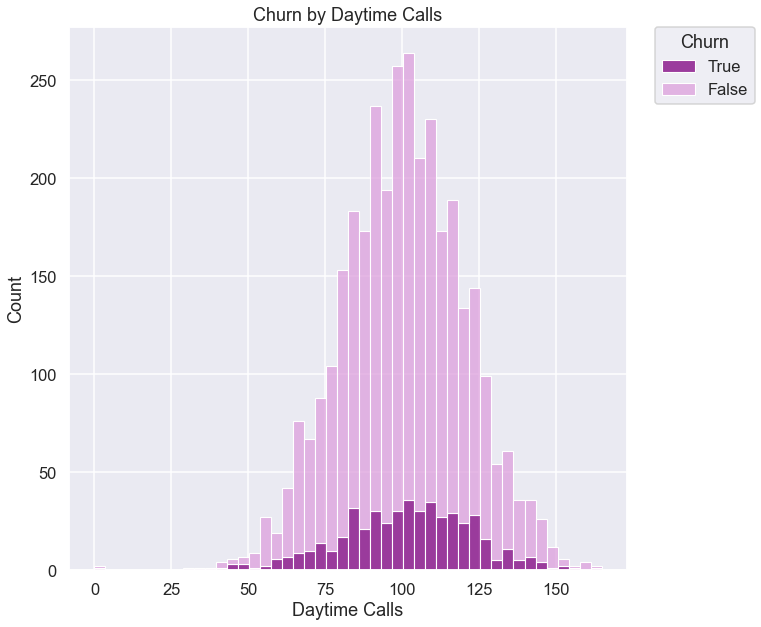

In [17]:
int_feature_v_churn('total day calls',
                   'Churn by Daytime Calls',
                   'Daytime Calls')

<a id = 'day_charges'></a>
### Day Charges

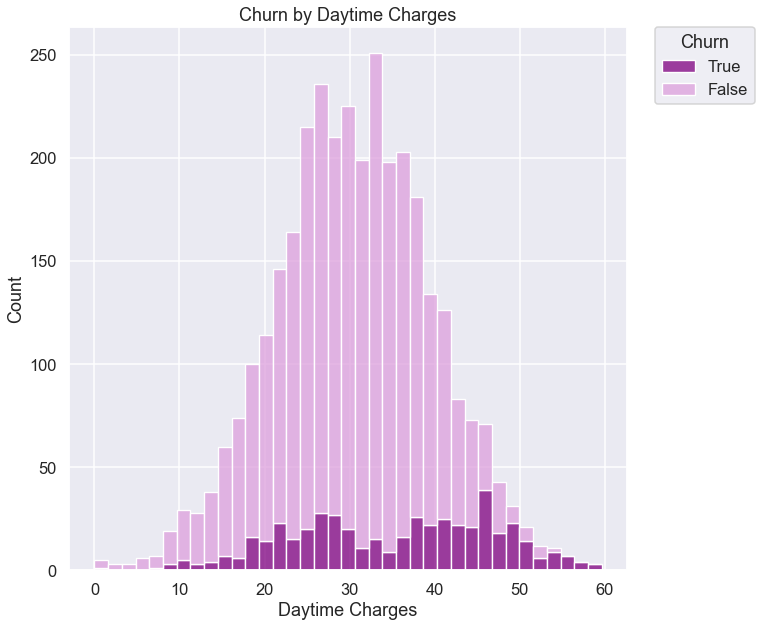

In [18]:
int_feature_v_churn('total day charge',
                   'Churn by Daytime Charges',
                   'Daytime Charges')

<a id = 'evening_minutes'></a>
### Evening Minutes

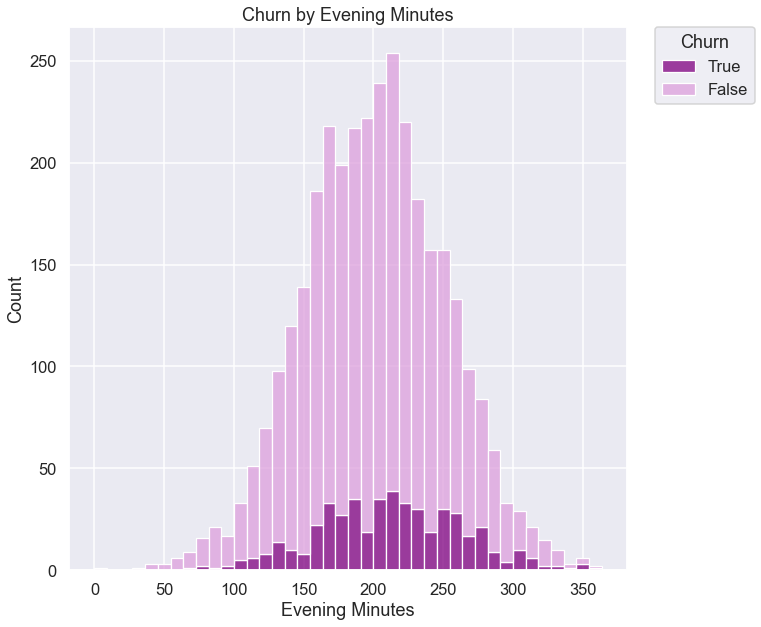

In [19]:
int_feature_v_churn('total eve minutes',
                   'Churn by Evening Minutes',
                   'Evening Minutes')

<a id = 'evening_calls'></a>
### Evening Calls

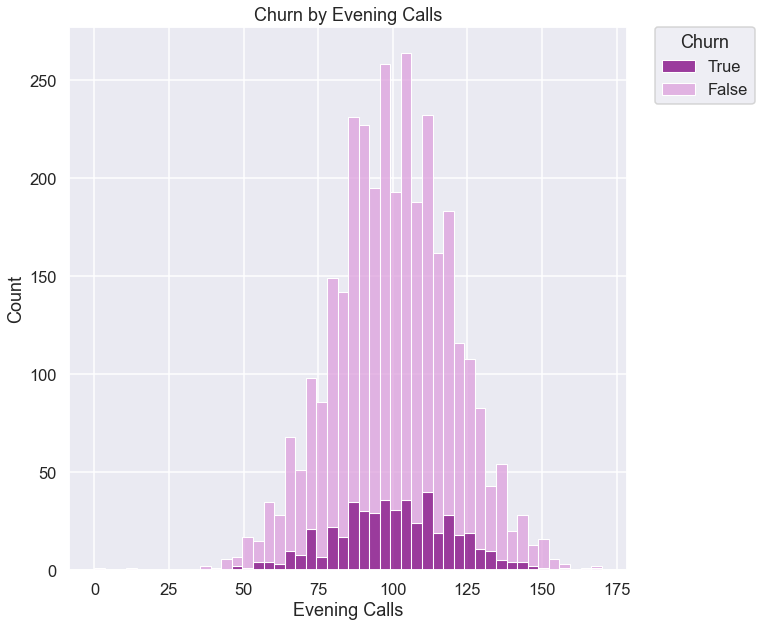

In [20]:
int_feature_v_churn('total eve calls',
                   'Churn by Evening Calls',
                   'Evening Calls')

<a id = 'evening_charges'></a>
### Evening Charges

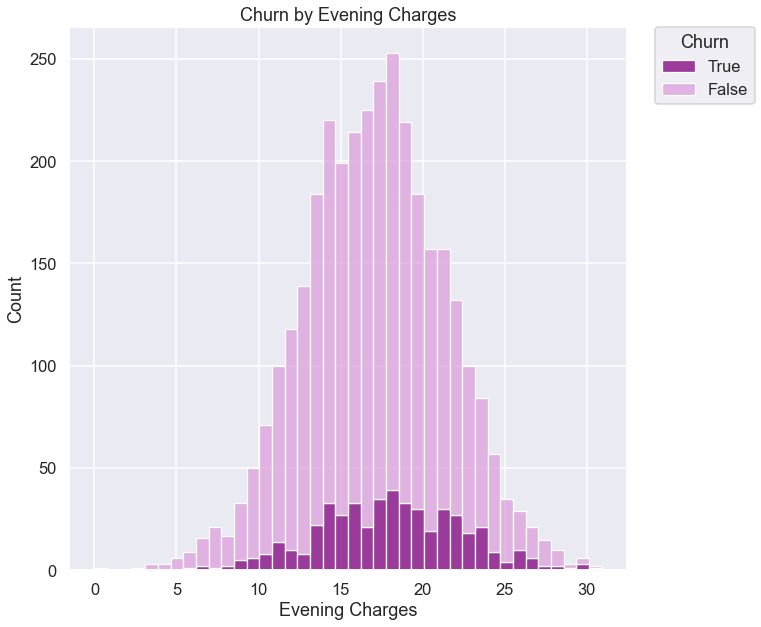

In [21]:
int_feature_v_churn('total eve charge',
                   'Churn by Evening Charges',
                   'Evening Charges')

<a id = 'night_minutes'></a>
### Night Minutes

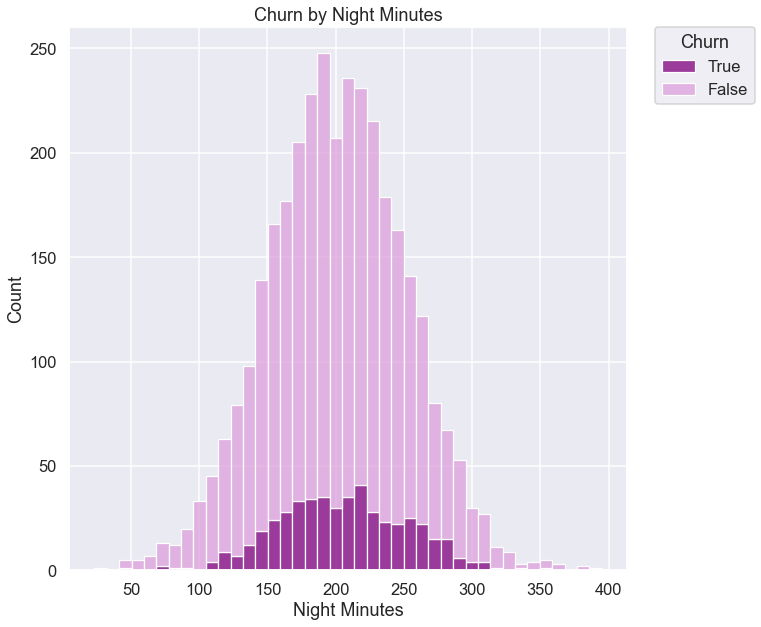

In [22]:
int_feature_v_churn('total night minutes',
                   'Churn by Night Minutes',
                   'Night Minutes')

<a id = 'night_calls'></a>
### Night Calls

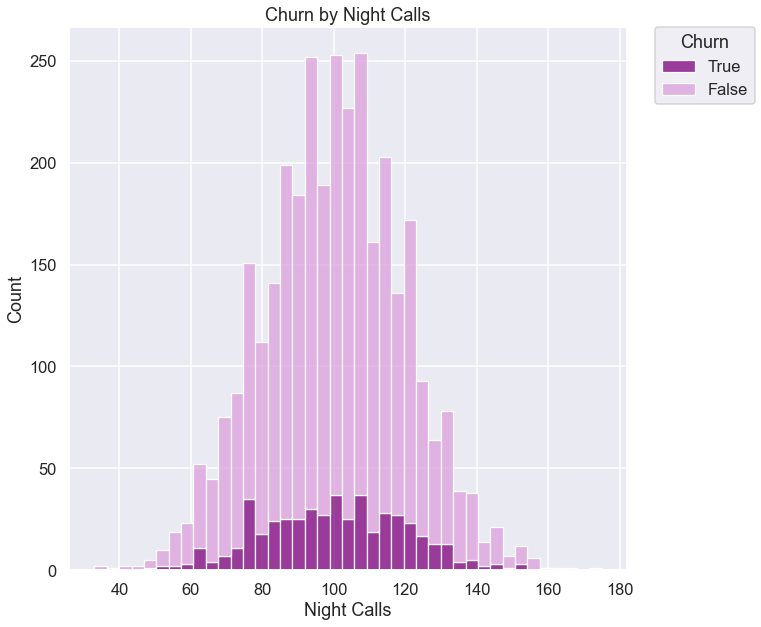

In [23]:
int_feature_v_churn('total night calls',
                   'Churn by Night Calls',
                   'Night Calls')

<a id = 'night_charges'></a>
### Night Charges

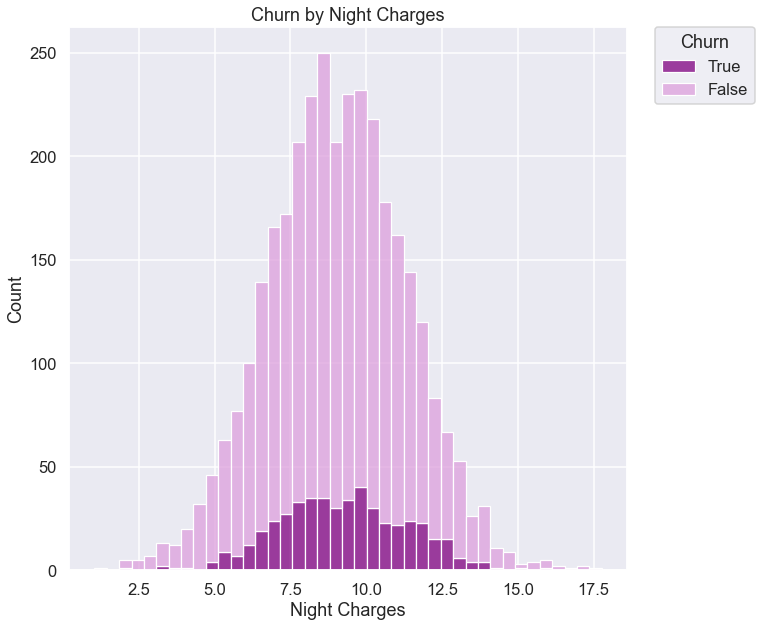

In [24]:
int_feature_v_churn('total night charge',
                   'Churn by Night Charges',
                   'Night Charges')

<a id = 'international_minutes'></a>
### International Minutes

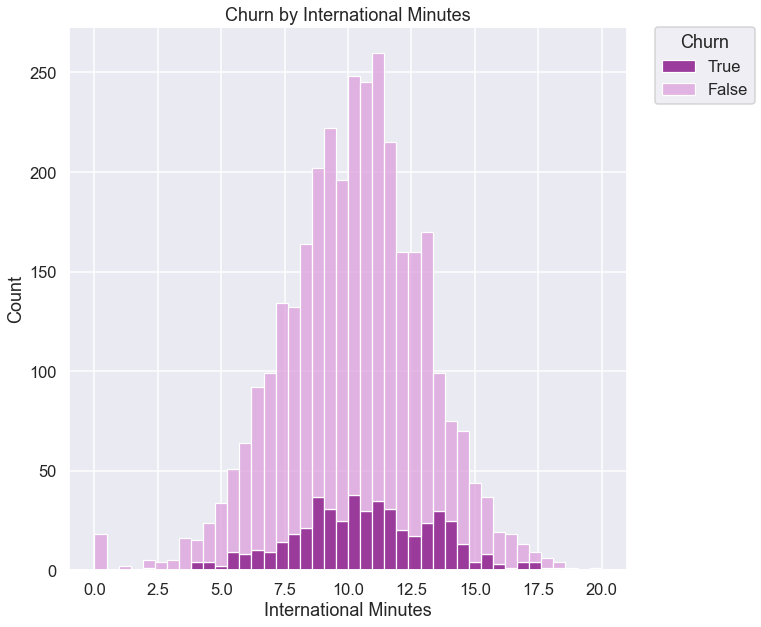

In [25]:
int_feature_v_churn('total intl minutes',
                   'Churn by International Minutes',
                   'International Minutes')

<a id = 'international_calls'></a>
### International Calls

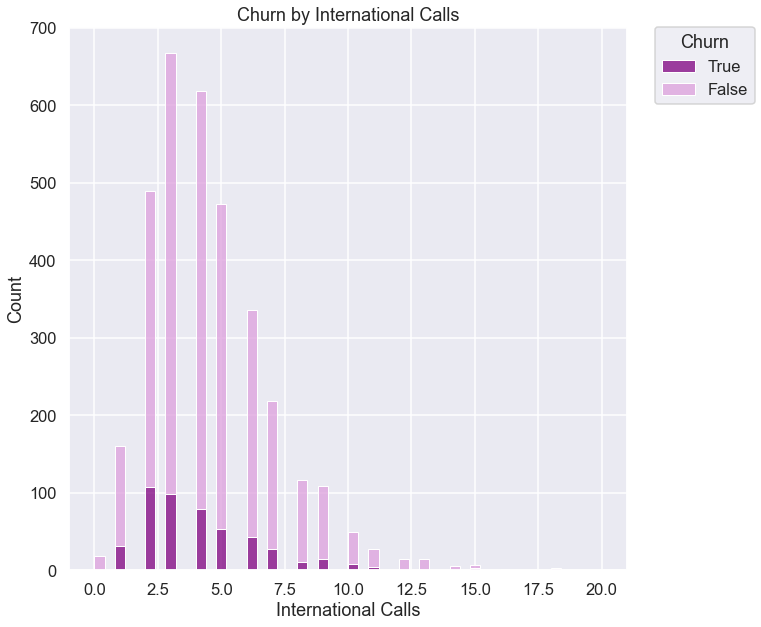

In [26]:
int_feature_v_churn('total intl calls',
                   'Churn by International Calls',
                   'International Calls')

<a id = 'international_charges'></a>
### International Charges

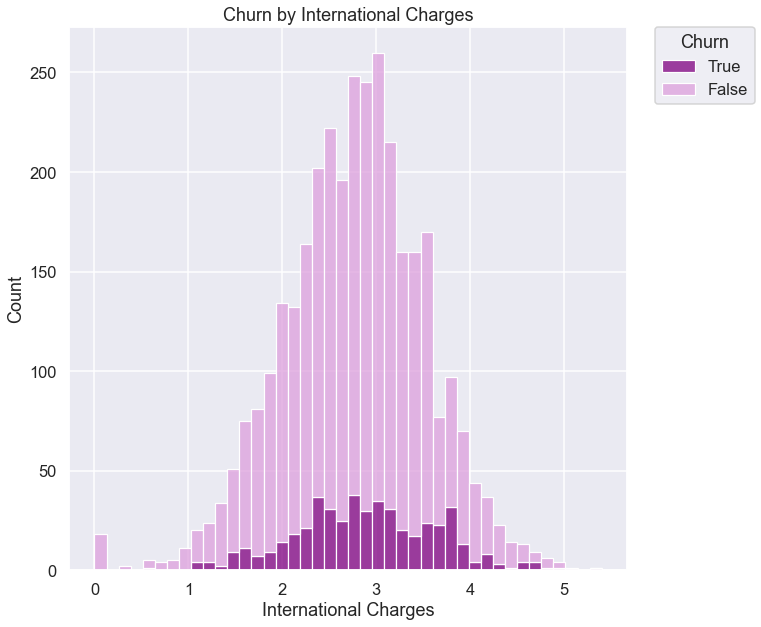

In [27]:
int_feature_v_churn('total intl charge',
                   'Churn by International Charges',
                   'International Charges')

<a id = 'customer_service_calls'></a>
### Customer Service Calls

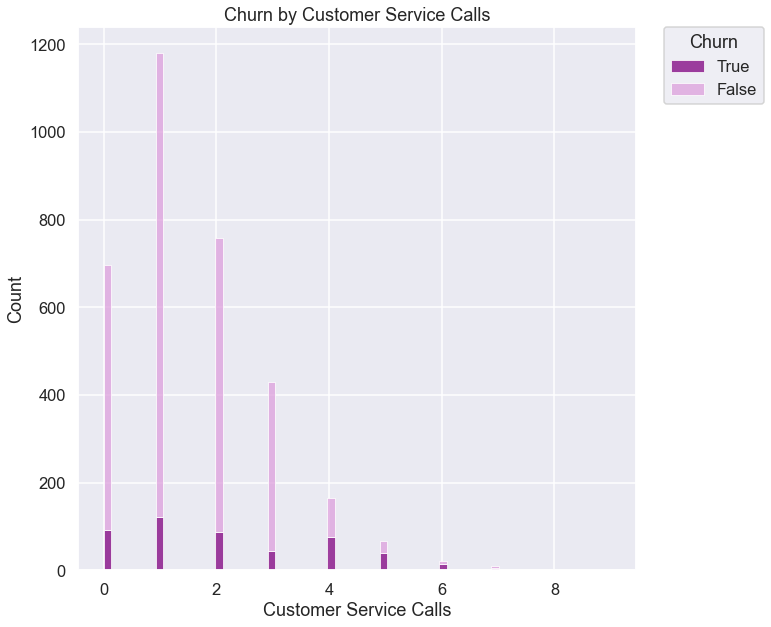

In [28]:
int_feature_v_churn('customer service calls',
                   'Churn by Customer Service Calls',
                   'Customer Service Calls')

<a id = 'correlation'></a>
## Correlation

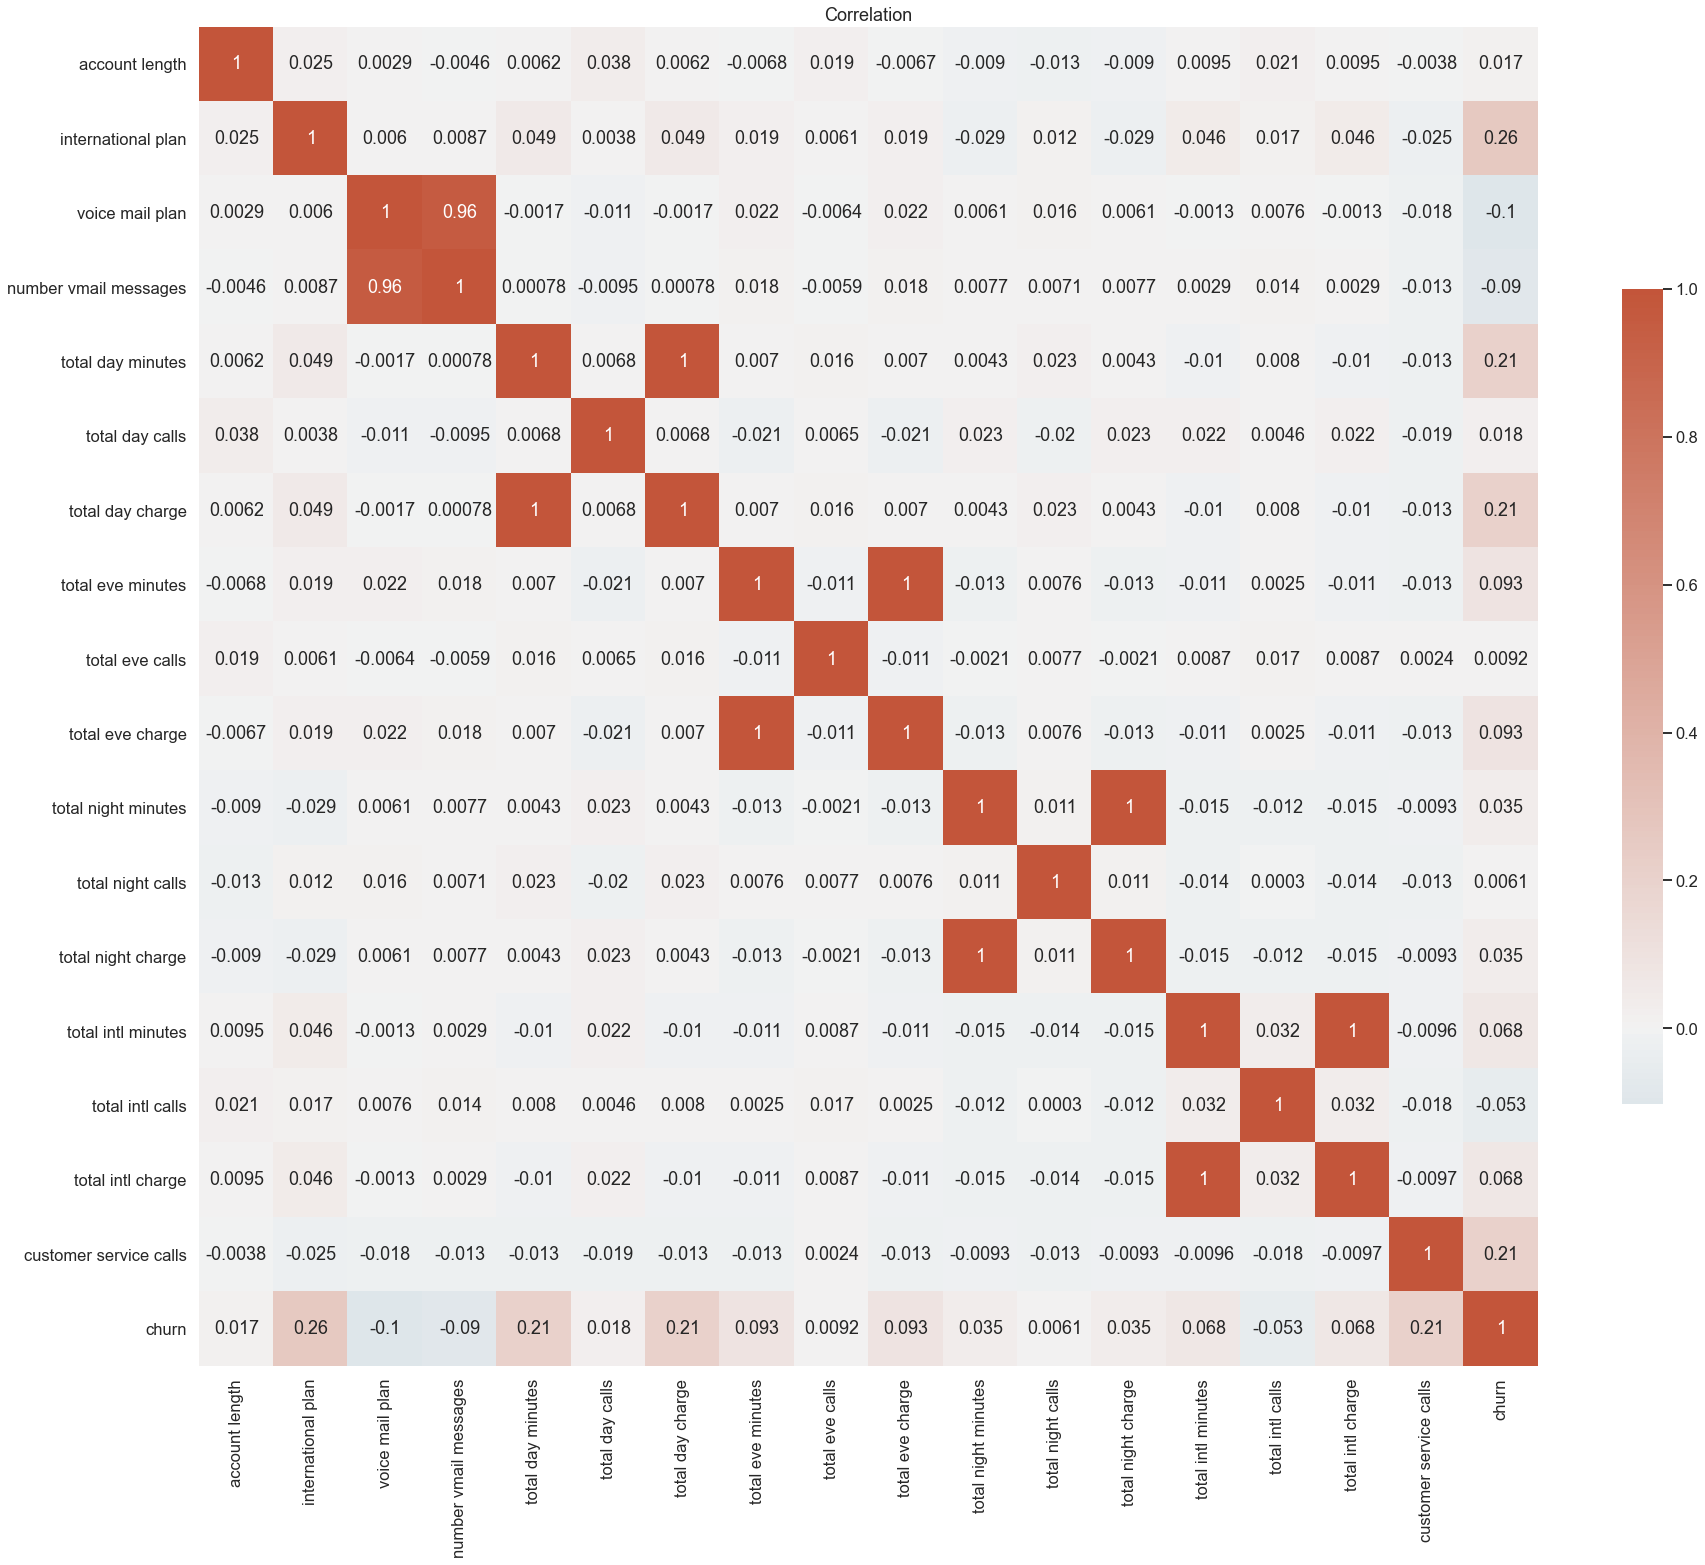

In [29]:
# Calculate multicollinearity of initial cit data

correlation = cit.corr(method = 'pearson')

# Visualize correlation with a heatmap

cmap = sns.diverging_palette(230, 20, as_cmap = True)

f, ax = plt.subplots(figsize = (30, 30))

sns.heatmap(correlation, vmax = 1, cmap = cmap, center = 0, square = True, 
            cbar_kws = {'shrink' : 0.5}, annot = True)
ax.set_title('Correlation')
plt.show()

<a id = 'feature_engineering'></a>
# Feature Engineering

In [30]:
# Create new dataframe in order to experiment with feature engineering

cit_mod1 = cit

### Functions

In [31]:
def int_feature_v_churn_mod(feature, title, xlabel):
    f, ax = plt.subplots(figsize=(5, 5))
    sns.set_palette(sns.color_palette(['plum', 'purple']))
    sns.histplot(data = cit_mod1, ax = ax, stat = 'count', multiple = 'stack',
                 x = feature, kde = False, hue = 'churn',
                 element = 'bars', legend = True)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.legend(title = 'Churn', labels = ['True', 'False'],
             bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0);

<a id = 'engineered_features'></a>
## Engineered Features

<a id = 'total_minutes'></a>
### Total Minutes

In [32]:
cit_mod1['total minutes'] = (cit['total day minutes']
                            + cit['total eve minutes']
                            + cit['total night minutes'])

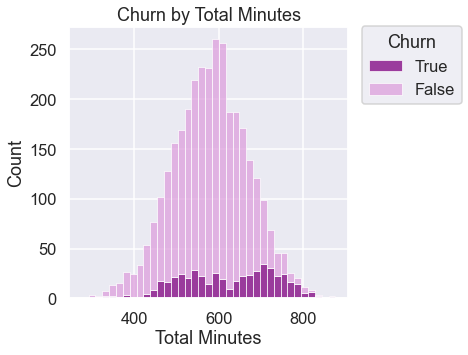

In [33]:
int_feature_v_churn_mod('total minutes',
                        'Churn by Total Minutes',
                        'Total Minutes')

<a id = 'total_calls'></a>
### Total Calls

In [34]:
cit_mod1['total calls'] = (cit['total day calls']
                            + cit['total eve calls']
                            + cit['total night calls'])

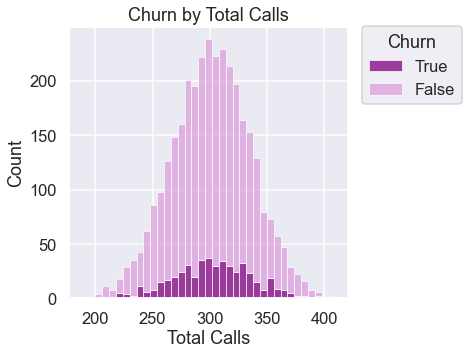

In [35]:
int_feature_v_churn_mod('total calls',
                        'Churn by Total Calls',
                        'Total Calls')

<a id = 'total_charges'></a>
### Total Charges

In [36]:
cit_mod1['total charge'] = (cit['total day charge']
                            + cit['total eve charge']
                            + cit['total night charge'])

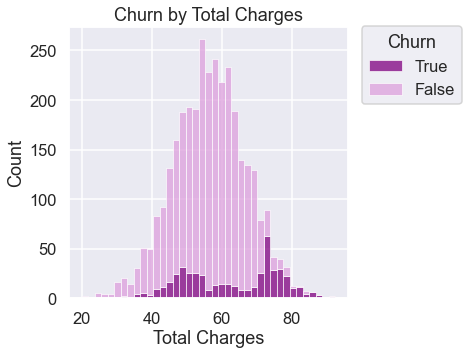

In [37]:
int_feature_v_churn_mod('total charge',
                        'Churn by Total Charges',
                        'Total Charges')

<a id = 'minutes_per_call'></a>
### Average Minutes per Call

In [38]:
cit_mod1['ave call minutes'] = (cit_mod1['total minutes'] 
                                       / cit_mod1['total calls'])

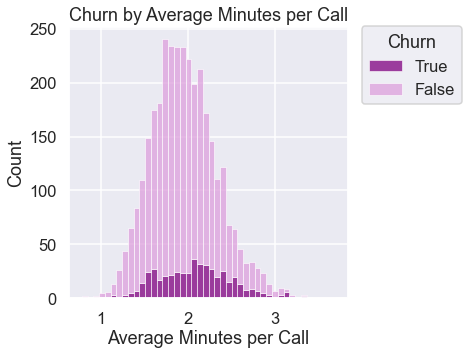

In [39]:
int_feature_v_churn_mod('ave call minutes',
                        'Churn by Average Minutes per Call',
                        'Average Minutes per Call')

<a id = 'charges_per_call'></a>
### Average Charges per Call

In [40]:
cit_mod1['ave call charge'] = (cit_mod1['total charge'] 
                                       / cit_mod1['total calls'])

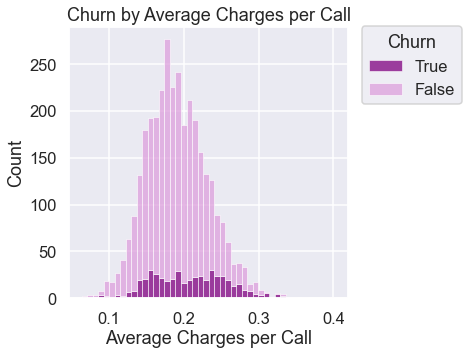

In [41]:
int_feature_v_churn_mod('ave call charge',
                        'Churn by Average Charges per Call',
                        'Average Charges per Call')

<a id = 'charges_per_minute'></a>
### Averages Charges per Minute

In [42]:
cit_mod1['ave minute charge'] = (cit_mod1['total charge'] 
                                       / cit_mod1['total minutes'])

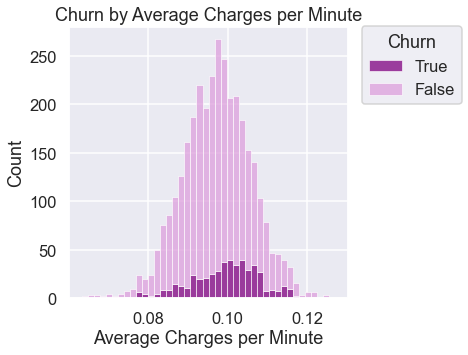

In [43]:
int_feature_v_churn_mod('ave minute charge',
                        'Churn by Average Charges per Minute',
                        'Average Charges per Minute')

<a id = 'international_minutes_per_total'></a>
### International Minutes Percent of Total Minutes

In [44]:
cit_mod1['intl min per total'] = (cit['total intl minutes'] 
                                       / cit_mod1['total minutes'])

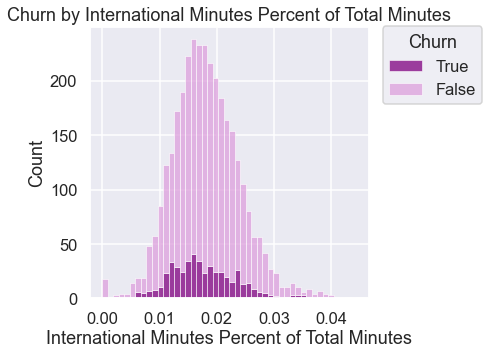

In [45]:
int_feature_v_churn_mod('intl min per total',
                        'Churn by International Minutes Percent of Total Minutes',
                        'International Minutes Percent of Total Minutes')

<a id = 'international_calls_per_total'></a>
### International Calls Percent of Total Calls

In [46]:
cit_mod1['intl calls per total'] = (cit['total intl calls'] 
                                       / cit_mod1['total calls'])

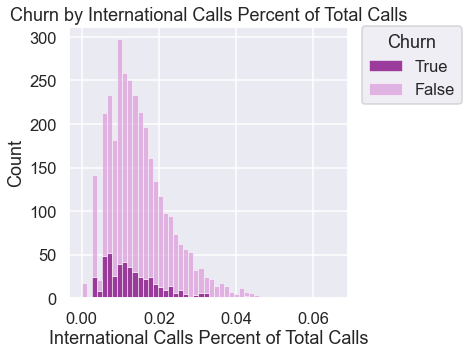

In [47]:
int_feature_v_churn_mod('intl calls per total',
                        'Churn by International Calls Percent of Total Calls',
                        'International Calls Percent of Total Calls')

<a id = 'international_charges_per_total'></a>
### International Charges Percent of Total Charges

In [48]:
cit_mod1['intl charge per total'] = (cit['total intl charge'] 
                                       / cit_mod1['total charge'])

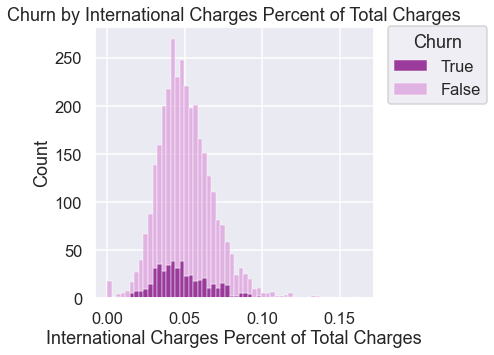

In [49]:
int_feature_v_churn_mod('intl charge per total',
                        'Churn by International Charges Percent of Total Charges',
                        'International Charges Percent of Total Charges')

<a id = 'correlation_engineered_features'></a>
## Correlation of Engineered Features

In [50]:
cit_mod1 = cit_mod1.drop(['international plan',
                        'total day minutes',
                        'total day calls',
                        'total day charge',
                        'total eve minutes',
                        'total eve calls',
                        'total eve charge',
                        'total night minutes',
                        'total night calls',
                        'total night charge',
                        'total intl minutes',
                        'total intl calls',
                        'total intl charge'],
                        axis = 1)

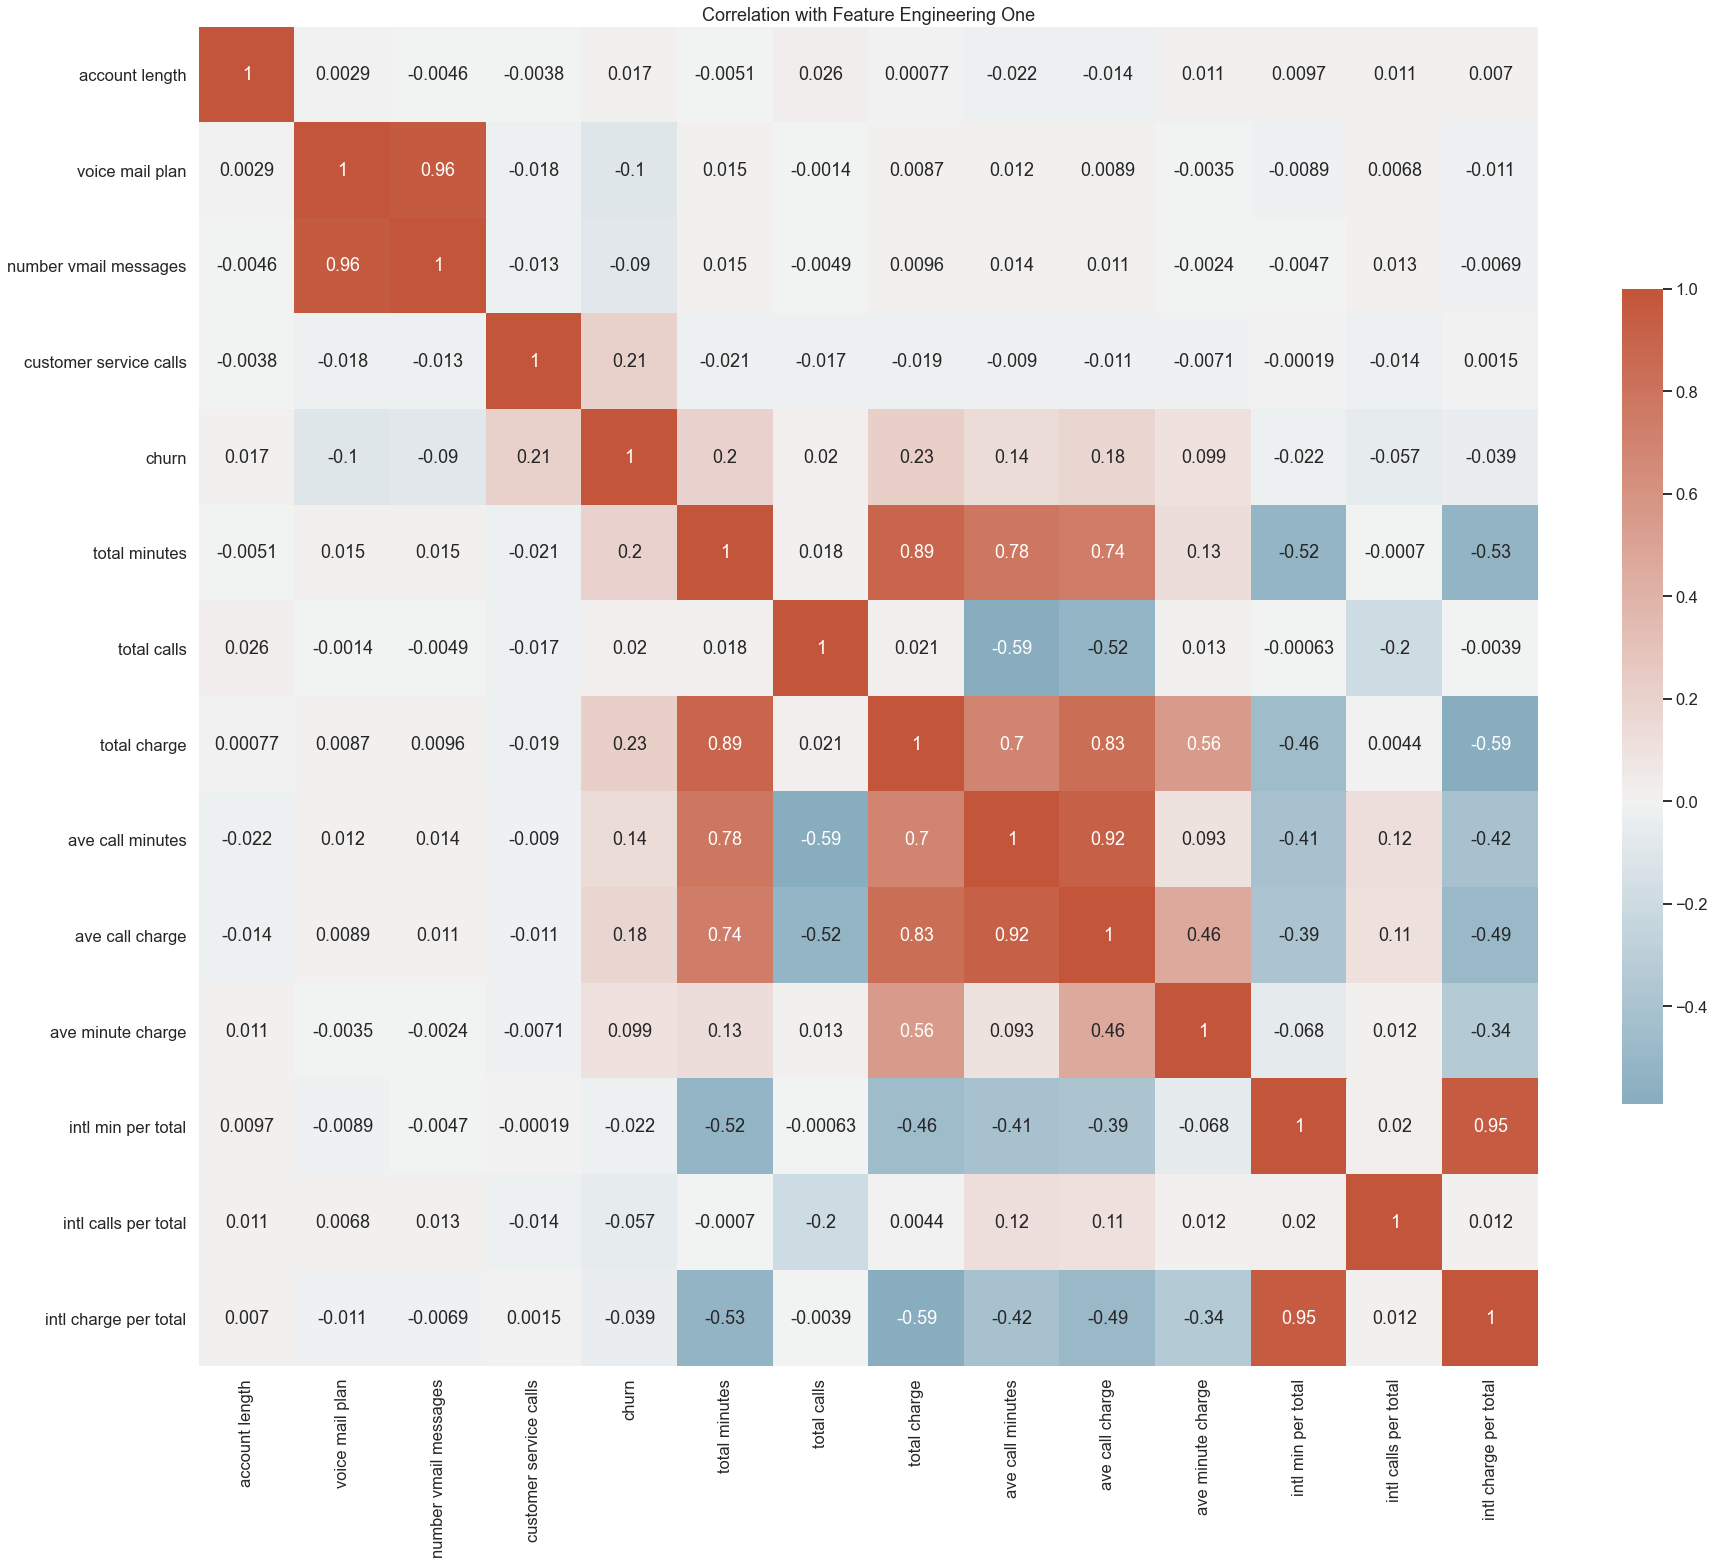

In [51]:
# Calculate multicollinearity of cit data with feature engineering

correlation_mod1 = cit_mod1.corr(method = 'pearson')

# Visualize correlation with a heatmap

cmap = sns.diverging_palette(230, 20, as_cmap = True)

f, ax = plt.subplots(figsize = (30, 30))

sns.heatmap(correlation_mod1, vmax = 1, cmap = cmap, center = 0, square = True, 
            cbar_kws = {'shrink' : 0.5}, annot = True)
ax.set_title('Correlation with Feature Engineering One')
plt.show()

<a id = 'evaluation_engineered_features'></a>
## Evaluation of Engineered Features

Due to the engineered features displaying increased correlation compared with the initial features, the changes will be discared.

In [52]:
cit = cit.drop(['total minutes',
               'total calls',
               'total charge',
               'ave call minutes',
               'ave call charge',
               'ave minute charge',
               'intl min per total',
               'intl calls per total',
               'intl charge per total'],
              axis = 1)

<a id = 'train_test_split'></a>
# Train, Test Split and Data Normalization

In [53]:
# Drop target 'churn' from data

x = cit.drop(['churn'], axis = 1)

#Define target, 'churn'

y = cit['churn']

In [54]:
# Scale data

x_columns = list(x.columns)

pipeline = Pipeline([('std_scaler', StandardScaler())])

x = pd.DataFrame(data = pipeline.fit_transform(x), columns = x_columns)

In [55]:
# Split data in train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, 
                                                    random_state = 13)

<a id = 'evaluation_metrics'></a>
# Evaluation Metrics

In [56]:
# Calculate the inverse of the percentage of customers who churn
# for comparision to accuracy scores of models

churn_inverse = 100 - (churn_percent * 100)
churn_inverse

85.5085508550855

The following metrics are being calculated for each of the models tested:
* Accuracy as compared to the inverse of the percentage of churn (85.51%)(the average of random samplings of the data would have an accuracy of 85.51%, therefore, for accuracy to be considered positive it would need to indicate a significant improvement over this baseline)

* Precision, the ratio of false negatives, instances correctly identified as churned

* Recall, the ratio of true positives, instances correctly identified as not churned

* F1 Score, the weighted average of the precision and recall values

* ROC Score, the measurement of the Area Under the Curve (AUC) for the Receiver Operating Characteristic (ROC), a plot of True Positive Rate (TPR) v False Positive Rate (FPR)

Training and Test data metrics will be displayed to ensure overfitting is avoided.

The base metric used to evaluate the success of the models will be ROC Score, analyzing the predictive power through maximizing true positives and minimizing false positives.

San Bay Tel has requested a model predicting the likelihood of churn.  Therefore, for the purposes of the this project the next highest valued metric will be Precision, the proportion of actual customers who churned correctly classified with F1 Score considered only as a third (much lessor) metric for comparison purposes between similarly performing models.

<a id = 'models'></a>
# Models

### Functions

In [57]:
# Use Grid Search to find the best parameters for model

def model_grid(model, params):
    lr_grid = GridSearchCV(model, params, cv = 5)
    lr_grid.fit(x_train, y_train)
    display(lr_grid.best_params_)

# Calculate model accuracy

def model_accuracy(model):
    model.fit(x_train, y_train)
    
    predictions_train = model.predict(x_train)
    predictions_test = model.predict(x_test)
    
    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_test = accuracy_score(y_test, predictions_test)
    
    print('Train Data Accuracy:', accuracy_train)
    print('Test Data Accuracy:', accuracy_test)

# Generate model report with precision, recall, and F1

def model_report(model):
    model.fit(x_train, y_train)
    
    predictions_train = model.predict(x_train)
    predictions_test = model.predict(x_test)
    
    report_train = classification_report(y_train,
                                         predictions_train,
                                         output_dict = True)
    report_test = classification_report(y_test,
                                        predictions_test,
                                        output_dict = True)
    
    report_df = (pd.DataFrame(report_train))
    report_df = report_df.rename(columns = {'0' : 'Train - False',
                                '1' : 'Train - True'})
    report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'],
                               axis = 1)
    report_test_df = (pd.DataFrame(report_test))
    report_df['Test - False'] = report_test_df['0']
    report_df['Test - True'] = report_test_df['1']
    report_df = report_df[['Train - False',
                           'Test - False',
                           'Train - True',
                           'Test - True']]
    
    display(report_df)

# Visualize Confusion Matrix, visually representing the dispersal of 
# True Positives, True Negatives, False Positives, and False Negatives

def model_cm(model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    matrix = confusion_matrix(y_test, predictions)
    f, ax = plt.subplots(figsize = (10, 10))
    sns.heatmap(matrix, annot = True)
    ax.set_title('Confusion Matrix')
    plt.show()

# Calculate model ROC Score

def model_roc(model):
    model.fit(x_train, y_train)
    
    predictions_train = model.predict(x_train)
    predictions_test = model.predict(x_test)
    
    roc_train = roc_auc_score(y_train, predictions_train)
    roc_test = roc_auc_score(y_test, predictions_test)
    
    print('Train Data ROC:', roc_train)
    print('Test Data ROC:', roc_test)

# Visualize ROC Curve

def model_roc_curve(model):
    model.fit(x_train, y_train)
    
    predictions_train = model.predict(x_train)
    predictions_test = model.predict(x_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_test)
    roc_auc = metrics.auc(fpr, tpr)
    
    f, ax = plt.subplots(figsize = (10, 10))
    plt.plot(fpr, tpr, 'purple', linestyle = '--', label = 'Model')
    plt.plot([0, 1], [0, 1], 'plum')
    ax.set_title('Receiver Operating Characteristic')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0);

<a id = 'logistic_regression'></a>
## Logistic Regression

In [58]:
# Define Model

lr = LogisticRegression()

In [59]:
# Define lr parameters for Grid Search

lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}

# Use Grid Search to find the best parameters for lr

model_grid(lr, lr_params)

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear

{'C': 0.01, 'solver': 'newton-cg'}

In [60]:
lr_best = LogisticRegression(C = 0.01,
                       solver = 'newton-cg')

# Refine lr parameters for Grid Search

lr_params = {'penalty' : ['l2', 'none']}

model_grid(lr_best, lr_params)

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


{'penalty': 'l2'}

In [61]:
# Define best paramters for lr

lr_best = LogisticRegression(C = 0.01,
                             penalty = 'l2',
                             solver = 'newton-cg')

In [62]:
# Fit and train lr using best parameters
# Calculate accuracy metric for lr
# Calculate precision, recall, and F1 metrics for lr

model_accuracy(lr_best)
model_report(lr_best)

Train Data Accuracy: 0.8616205401800601
Test Data Accuracy: 0.8682634730538922


,Train - False,Test - False,Train - True,Test - True
precision,0.869505,0.869969,0.597701,0.818182
recall,0.986365,0.992933,0.120370,0.176471
f1-score,0.924256,0.927393,0.200385,0.290323
support,2567.000000,283.000000,432.000000,51.000000


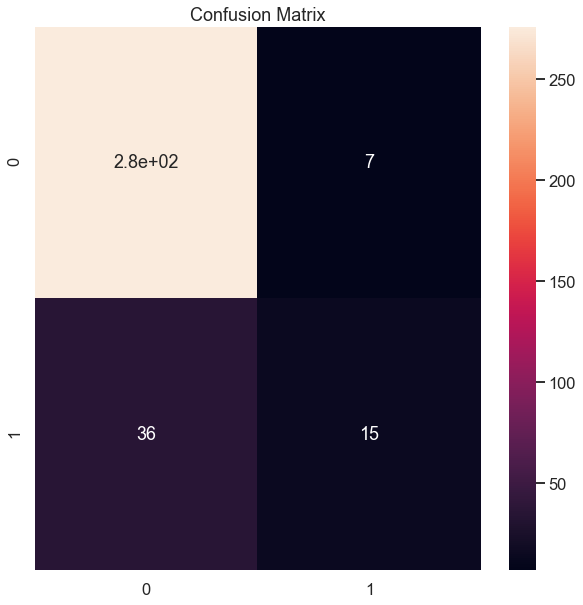

In [63]:
# Visualize Confusion Matrix for lr

model_cm(lr)

In [64]:
# Calculate ROC Score for lr

model_roc(lr_best)

Train Data ROC: 0.5533678887301794
Test Data ROC: 0.5847017252130534


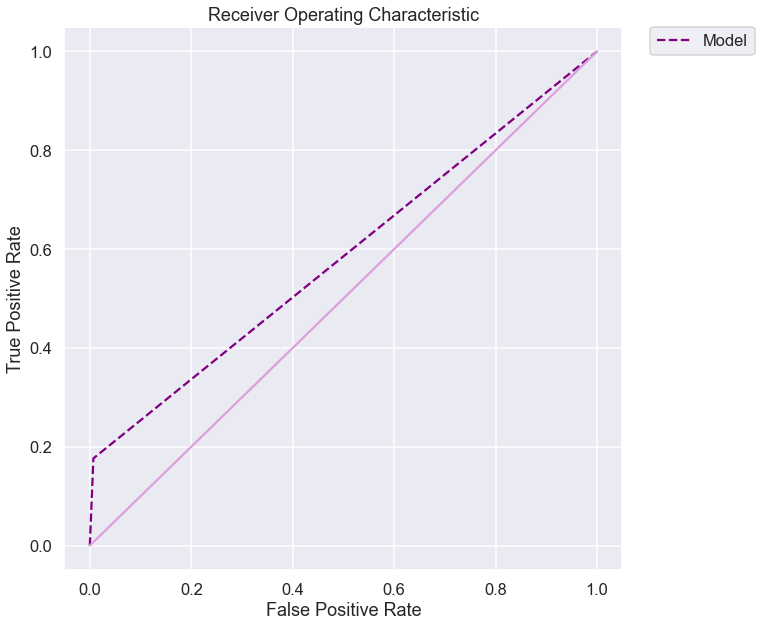

In [65]:
# Visualize ROC for lr

model_roc_curve(lr_best)

### Evaluation

ROC Score, 64.00% is low.

Precision is also 75.00%.

<a id = 'kneighbors'></a>
## K Neighbors

In [66]:
#Define model

kn = KNeighborsClassifier()

In [67]:
# Define kn parameters for Grid Search

kn_params = {'leaf_size' : [1, 10, 20, 30, 40, 50],
             'weights' : ['uniform', 'distance'],
             'n_neighbors' : [1, 10, 20, 30],
             'p' : [1, 2]}

# Use Grid Search to find the best parameters for kn

model_grid(kn, kn_params)

{'leaf_size': 1, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [68]:
# Refine kn parameters for Grid Search

kn_best = KNeighborsClassifier(p = 1, weights = 'distance')

kn_params = {'leaf_size' : [1, 5],
             'n_neighbors' : [5, 10, 15]}

model_grid(kn_best, kn_params)

{'leaf_size': 1, 'n_neighbors': 10}

In [69]:
# Refine kn parameters for Grid Search

kn_best = KNeighborsClassifier(leaf_size = 1, p = 1, weights = 'distance')

kn_params = {'n_neighbors' : [5, 6, 7, 8, 9]}

model_grid(kn_best, kn_params)

{'n_neighbors': 8}

In [70]:
# Define best paramters for kn

kn_best = KNeighborsClassifier(leaf_size = 1, p = 1, weights = 'distance', n_neighbors = 8)

In [71]:
# Fit and train kn using best parameters
# Calculate accuracy metric for kn
# Calculate precision, recall, and F1 metrics for kn

model_accuracy(kn_best)
model_report(kn_best)

Train Data Accuracy: 1.0
Test Data Accuracy: 0.8982035928143712


,Train - False,Test - False,Train - True,Test - True
precision,1.0,0.897764,1.0,0.904762
recall,1.0,0.992933,1.0,0.372549
f1-score,1.0,0.942953,1.0,0.527778
support,2567.0,283.000000,432.0,51.000000


In [72]:
# Train metrics for kn appear to be overfitting
# Redefine best paramters for kn

kn_best = KNeighborsClassifier(leaf_size = 1, p = 1, n_neighbors = 8)

In [73]:
# Fit and train kn using best parameters
# Calculate accuracy metric for kn
# Calculate precision, recall, and F1 metrics for kn

model_accuracy(kn_best)
model_report(kn_best)

Train Data Accuracy: 0.8982994331443814
Test Data Accuracy: 0.874251497005988


,Train - False,Test - False,Train - True,Test - True
precision,0.894902,0.873065,0.970370,0.909091
recall,0.998442,0.996466,0.303241,0.196078
f1-score,0.943841,0.930693,0.462081,0.322581
support,2567.000000,283.000000,432.000000,51.000000


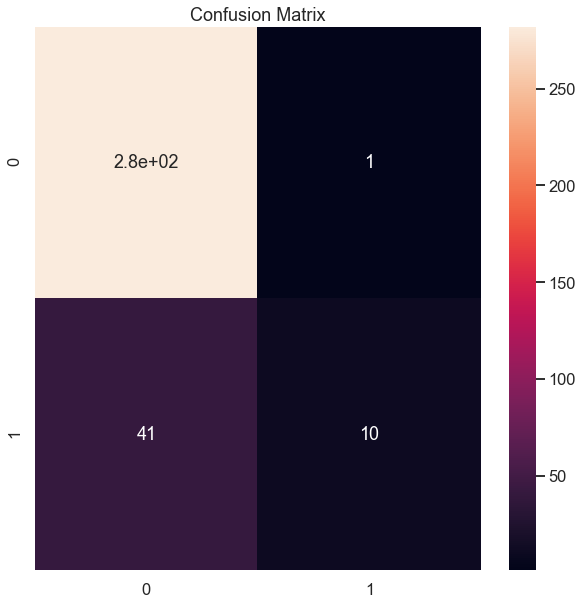

In [74]:
# Visualize Confusion Matrix for kn

model_cm(kn_best)

In [75]:
# Calculate ROC Score for dt

model_roc(kn_best)

Train Data ROC: 0.6508412507755125
Test Data ROC: 0.5962724312339777


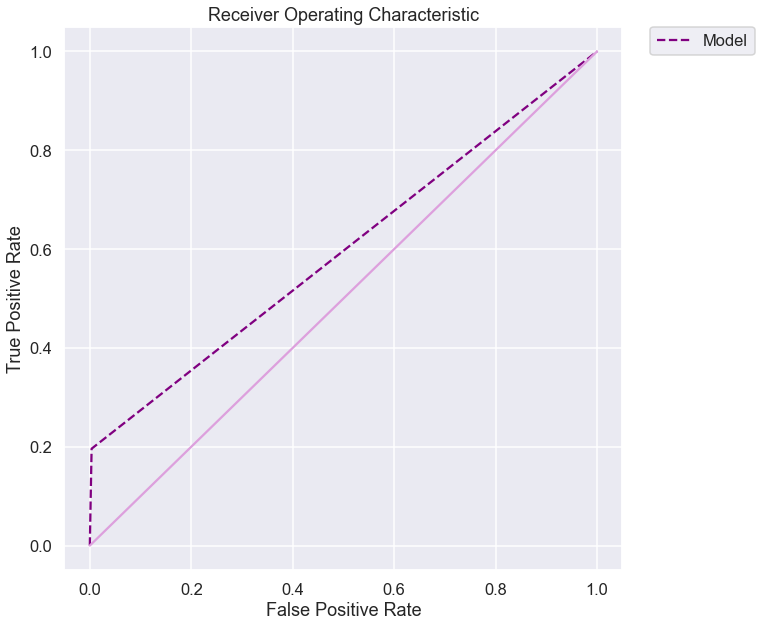

In [76]:
# Visualize ROC for dt

model_roc_curve(kn_best)

### Evaluation

ROC Score, 57.48%, is lower than Logistic Regression.

Precision, 80.00%, is higher than Logistic Regression.

<a id = 'decision_tree'></a>
## Decision Tree

In [77]:
# Define model

dt = DecisionTreeClassifier()

In [78]:
# Define dt parameters for Grid Search

dt_params = {'criterion' : ['gini', 'entropy'],
            'max_depth' : [1, 5, 10],
            'min_samples_split' : [1, 5, 10],
            'min_samples_leaf' : [1, 5]}

# Use Grid Search to find the best parameters for dt

model_grid(dt, dt_params)

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [79]:
# Refine dt parameters for Grid Search

dt_best = DecisionTreeClassifier(random_state = 13, 
                                 criterion = 'entropy')

dt_params = {'max_depth' : [8, 9, 10],
            'min_samples_split' : [1, 2, 3],
            'min_samples_leaf' : [5, 5]}

model_grid(dt_best, dt_params)

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_

{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [80]:
# Define best paramters for dt

dt_best = DecisionTreeClassifier(random_state = 13, 
                                 criterion = 'entropy',
                                max_depth = 10, 
                                min_samples_leaf = 5,
                                min_samples_split = 2)

In [81]:
# Fit and train dt using best parameters
# Calculate accuracy metric for dt
# Calculate precision, recall, and F1 metrics for dt

model_accuracy(dt_best)
model_report(dt_best)

Train Data Accuracy: 0.9656552184061353
Test Data Accuracy: 0.9491017964071856


,Train - False,Test - False,Train - True,Test - True
precision,0.967375,0.949324,0.953168,0.947368
recall,0.993377,0.992933,0.800926,0.705882
f1-score,0.980204,0.970639,0.870440,0.808989
support,2567.000000,283.000000,432.000000,51.000000


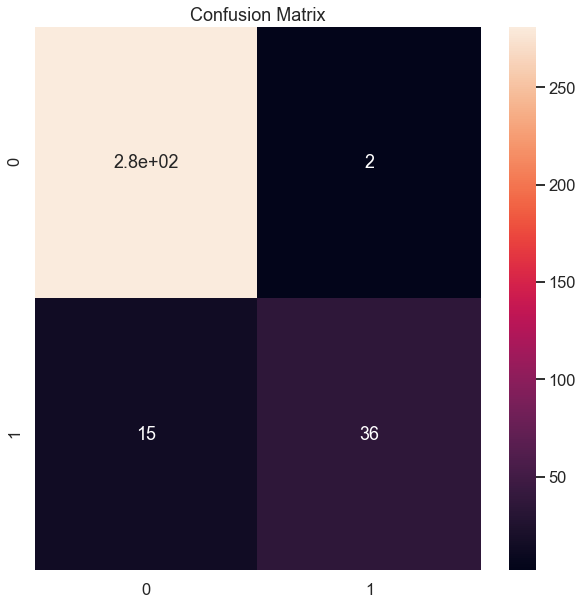

In [82]:
# Visualize Confusion Matrix for dt

model_cm(dt_best)

In [83]:
# Calculate ROC score for dt

model_roc(dt_best)

Train Data ROC: 0.8971517046848173
Test Data ROC: 0.8494076075659946


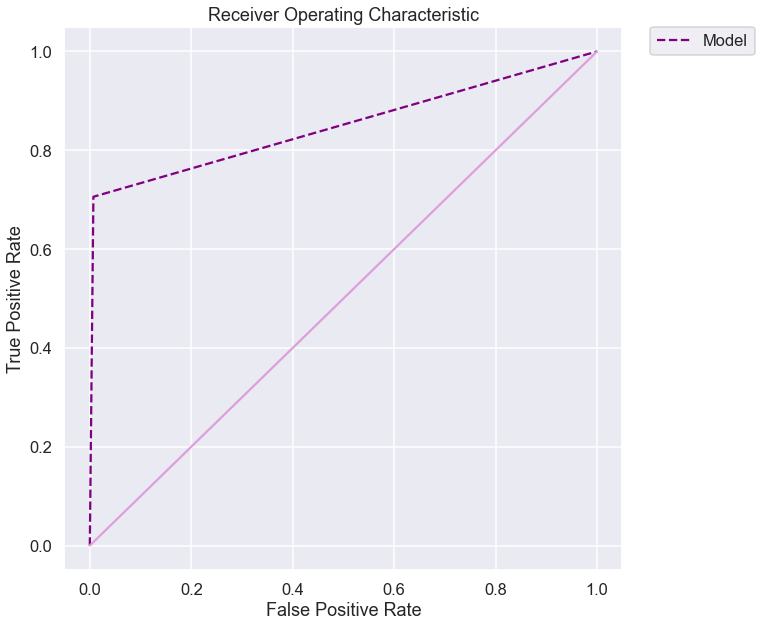

In [84]:
#Visualize ROC for dt

model_roc_curve(dt_best)

### Evaluation

ROC Score, 84.58%, is the highest of models so far.

Precision, 90.00%, is the highest of models so far.

<a id = 'extra_trees'></a>
## Extra Trees

In [85]:
# Define Model

et = ExtraTreesClassifier(random_state = 13)

In [86]:
# Define et parameters for Grid Search

et_params = {'max_depth' : [10, 50, 100],
            'min_samples_split' : [2, 5, 10],
            'min_samples_leaf' : [1, 5]}

# Use Grid Search to find the best parameters for et

model_grid(et, et_params)

{'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [87]:
# Refine et parameters for Grid Search

et_params = {'max_depth' : [40, 50, 60],
            'min_samples_split' : [4, 5, 6],
            'min_samples_leaf' : [1, 2, 3]}

model_grid(et, et_params)

{'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [88]:
# Refine et parameters for Grid Search

et_best = ExtraTreesClassifier(random_state = 13,
                               min_samples_leaf = 1, 
                               min_samples_split = 5)

et_params = {'max_depth' : [30, 40, 45]}

model_grid(et_best, et_params)

{'max_depth': 40}

In [89]:
# Refine et parameters for Grid Search

et_best = ExtraTreesClassifier(random_state = 13,
                               min_samples_leaf = 1, 
                               min_samples_split = 5)

et_params = {'max_depth' : [36, 37, 38, 39, 40]}

model_grid(et_best, et_params)

{'max_depth': 36}

In [90]:
# Define best paramters for et

et_best = ExtraTreesClassifier(random_state = 13, 
                               max_depth = 36, 
                               min_samples_leaf = 1, 
                               min_samples_split = 5)

In [91]:
# Fit and train et using best parameters
# Calculate accuracy metric for et
# Calculate precision, recall, and F1 metrics for et

model_accuracy(et_best)
model_report(et_best)

Train Data Accuracy: 0.9976658886295432
Test Data Accuracy: 0.9580838323353293


,Train - False,Test - False,Train - True,Test - True
precision,0.997280,0.952862,1.000000,1.000000
recall,1.000000,1.000000,0.983796,0.725490
f1-score,0.998638,0.975862,0.991832,0.840909
support,2567.000000,283.000000,432.000000,51.000000


In [92]:
# Train metrics for et appear to be overfitting
# Redefine best paramters for kn

et_best = ExtraTreesClassifier(random_state = 13, 
                               max_depth = 36, 
                               min_samples_leaf = 5, 
                               min_samples_split = 5)

In [93]:
# Refit and train et using best parameters
# Calculate accuracy metric for et
# Calculate precision, recall, and F1 metrics for et

model_accuracy(et_best)
model_report(et_best)

Train Data Accuracy: 0.9436478826275425
Test Data Accuracy: 0.907185628742515


,Train - False,Test - False,Train - True,Test - True
precision,0.938231,0.901274,1.000000,1.000000
recall,1.000000,1.000000,0.608796,0.392157
f1-score,0.968131,0.948074,0.756835,0.563380
support,2567.000000,283.000000,432.000000,51.000000


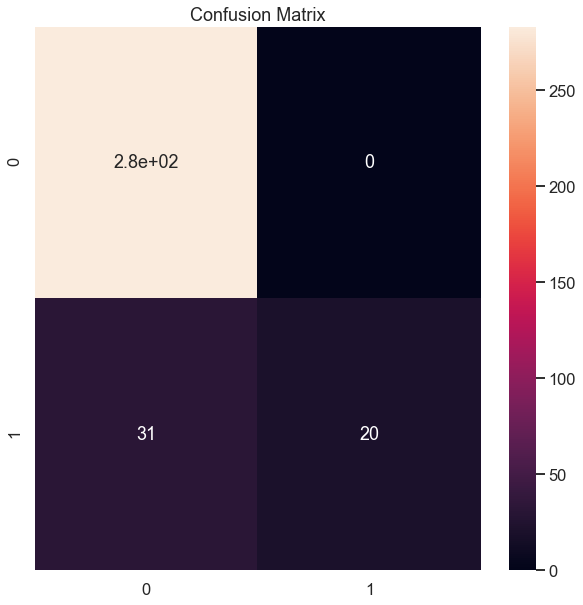

In [94]:
# Visualize Confusion Matrix for et

model_cm(et_best)

In [95]:
#Calculate ROC Score for et

model_roc(et_best)

Train Data ROC: 0.8043981481481481
Test Data ROC: 0.696078431372549


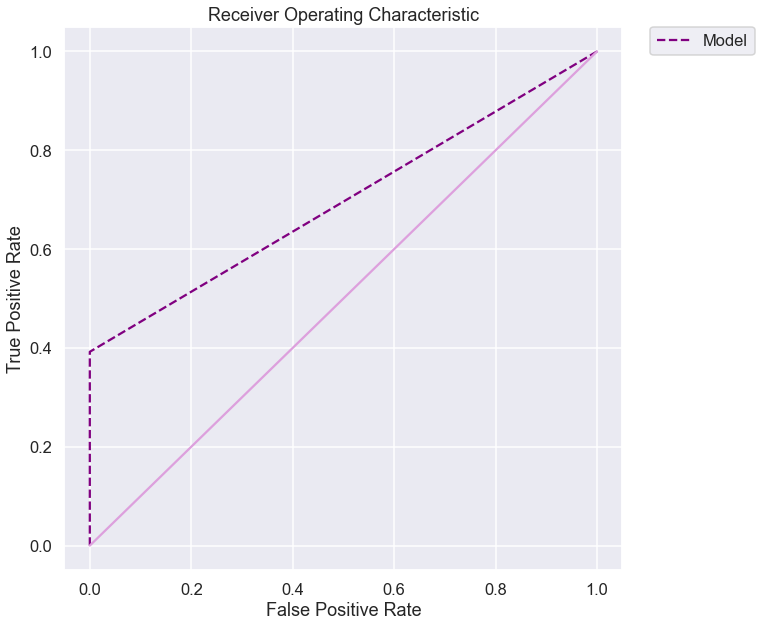

In [96]:
#Visualize ROC for et

model_roc_curve(et_best)

### Evaluation

ROC Score, 72.54%, is less-than the highest models so far (Decision Trees: 84.58%)

Precision is 100.00%.

<a id = 'random_forest'></a>
## Random Forest

In [97]:
# Define model

rf = RandomForestClassifier()

In [98]:
# Define rf parameters for Grid Search

rf_params = {'n_estimators' : [100, 150, 200],
             'criterion' :['gini', 'entropy'],
             'max_depth' : [10, 50, 100],
             'min_samples_split' : [2, 5, 10],
             'min_samples_leaf' : [1, 5]}

# Use Grid Search to find the best parameters for rf

model_grid(rf, rf_params)

{'criterion': 'entropy',
 'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [99]:
# Refine rf parameters for Grid Search

rf_best = RandomForestClassifier(criterion = 'entropy')

rf_params = {'n_estimators' : [125, 150, 175],
             'max_depth' : [40, 50, 60],
             'min_samples_split' : [8, 9, 10],
             'min_samples_leaf' : [1, 2, 3]}

model_grid(rf_best, rf_params)

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 150}

In [100]:
# Refine rf parameters for Grid Search

rf_best = RandomForestClassifier(n_estimators = 150,
                                 criterion = 'entropy',
                                 min_samples_leaf = 1)

rf_params = {'max_depth' : [30, 40, 45],
             'min_samples_split' : [6, 7, 8]}

model_grid(rf_best, rf_params)

{'max_depth': 30, 'min_samples_split': 6}

In [101]:
# Refine rf parameters for Grid Search

rf_best = RandomForestClassifier(n_estimators = 150,
                                 criterion = 'entropy',
                                 min_samples_split = 7,
                                 min_samples_leaf = 1)

rf_params = {'max_depth' : [43, 44, 45, 46, 47]}

model_grid(rf_best, rf_params)

{'max_depth': 43}

In [102]:
# Define best paramters for rf

rf_best = RandomForestClassifier(n_estimators = 150,
                                 criterion = 'entropy',
                                 max_depth = 44,
                                 min_samples_split = 7,
                                 min_samples_leaf = 1)

In [103]:
# Fit and train rf using best parameters
# Calculate accuracy metric for rf
# Calculate precision, recall, and F1 metrics for rf

model_accuracy(rf_best)
model_report(rf_best)

Train Data Accuracy: 0.9836612204068023
Test Data Accuracy: 0.9670658682634731


,Train - False,Test - False,Train - True,Test - True
precision,0.981269,0.965870,1.000000,1.000000
recall,1.000000,1.000000,0.886574,0.803922
f1-score,0.990546,0.982639,0.939877,0.891304
support,2567.000000,283.000000,432.000000,51.000000


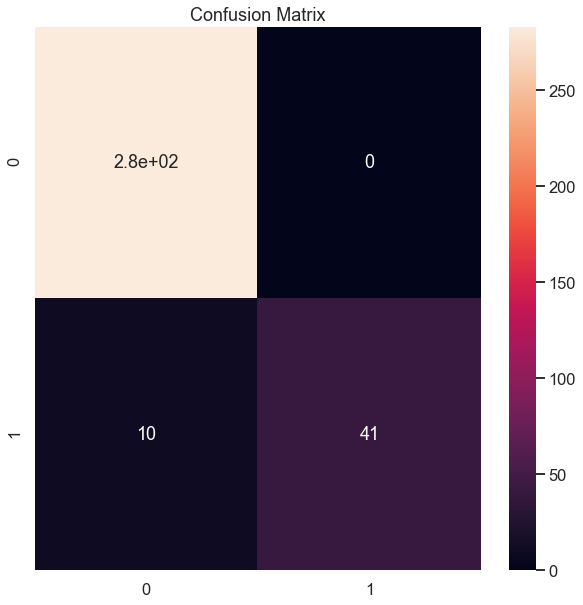

In [104]:
# Visualize Confusion Matrix for rf

model_cm(rf_best)

In [105]:
# Calculate ROC Score for rf

model_roc(rf_best)

Train Data ROC: 0.9409722222222222
Test Data ROC: 0.9019607843137255


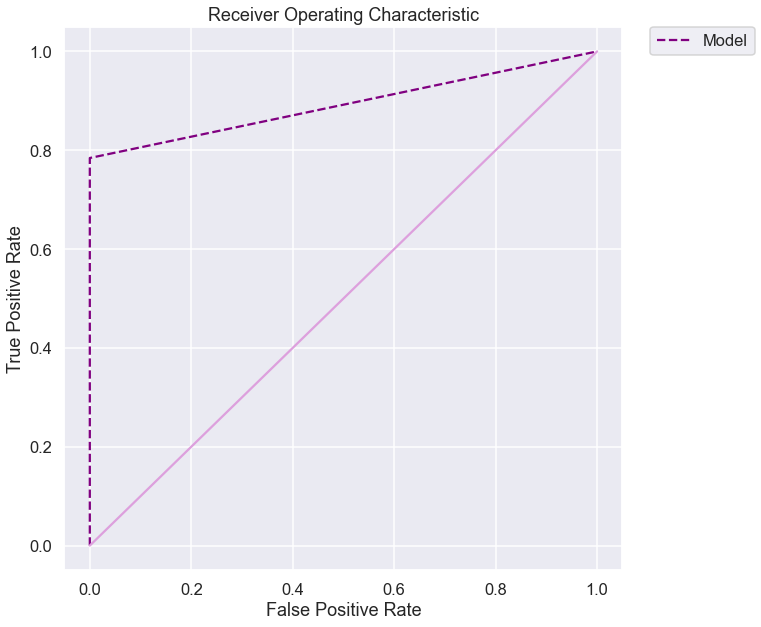

In [106]:
# Visualize ROC for rf

model_roc_curve(rf_best)

### Evaluation

ROC Score, 89.21%, is the highest of models so far.

Precision, 97.61%, less-than the highest model so far (Extra Trees: 100.00%).

F1 Score, 88.17%, is the highest of models so far.

<a id = 'adaboost'></a>
## Ada Boost Classifier

In [107]:
# Define Model

ada = AdaBoostClassifier(random_state = 13)

In [108]:
# Define ada parameters for Grid Search

ada_params = {'base_estimator' : [dt_best, et_best, rf_best]}

# Use Grid Search to find the best parameters for ada

model_grid(ada, ada_params)

{'base_estimator': RandomForestClassifier(criterion='entropy', max_depth=44, min_samples_split=7,
                        n_estimators=150)}

In [109]:
# Refine ada parameters for Grid Search

ada_best = AdaBoostClassifier(base_estimator = rf_best,
                              random_state = 13)

ada_params = {'n_estimators' : [10, 50, 100],
             'learning_rate' : [0.5, 1]}

model_grid(ada_best, ada_params)

{'learning_rate': 1, 'n_estimators': 10}

In [110]:
# Refine ada parameters for Grid Search

ada_best = AdaBoostClassifier(base_estimator = rf_best,
                              random_state = 13)

ada_params = {'n_estimators' : [10, 20, 30],
             'learning_rate' : [0.8, 0.9, 1]}

model_grid(ada_best, ada_params)

{'learning_rate': 1, 'n_estimators': 10}

In [111]:
# Refine ada parameters for Grid Search

ada_best = AdaBoostClassifier(base_estimator = rf_best,
                              learning_rate = 1,
                              random_state = 13)

ada_params = {'n_estimators' : [8, 10, 12]}

model_grid(ada_best, ada_params)

{'n_estimators': 8}

In [112]:
# Refine ada parameters for Grid Search

ada_best = AdaBoostClassifier(base_estimator = rf_best,
                              learning_rate = 1,
                              random_state = 13)

ada_params = {'n_estimators' : [5, 6, 7]}

model_grid(ada_best, ada_params)

{'n_estimators': 5}

In [113]:
# Refine ada parameters for Grid Search

ada_best = AdaBoostClassifier(base_estimator = rf_best,
                              learning_rate = 1,
                              random_state = 13)

ada_params = {'n_estimators' : [1, 2, 3, 4]}

model_grid(ada_best, ada_params)

{'n_estimators': 2}

In [114]:
# Define best paramters for ada

ada_best = AdaBoostClassifier(base_estimator = rf_best,
                              random_state = 13,
                             n_estimators = 2,
                             learning_rate = 1)

In [115]:
# Fit and train ada using best parameters
# Calculate accuracy metric for ada
# Calculate precision, recall, and F1 metrics for ada

model_accuracy(ada_best)
model_report(ada_best)

Train Data Accuracy: 0.9966655551850617
Test Data Accuracy: 0.9700598802395209


,Train - False,Test - False,Train - True,Test - True
precision,0.996120,0.965870,1.000000,1.000000
recall,1.000000,1.000000,0.976852,0.803922
f1-score,0.998056,0.982639,0.988290,0.891304
support,2567.000000,283.000000,432.000000,51.000000


In [116]:
# Train metrics for et appear to be overfitting
# Redefine best paramters for ada

ada_best = AdaBoostClassifier(base_estimator = rf_best,
                              n_estimators = 1,
                              random_state = 13,
                             learning_rate = 0.5)

In [117]:
# Refit and train ada using best parameters
# Calculate accuracy metric for ada
# Calculate precision, recall, and F1 metrics for ada

model_accuracy(ada_best)
model_report(ada_best)

Train Data Accuracy: 0.9826608869623208
Test Data Accuracy: 0.9700598802395209


,Train - False,Test - False,Train - True,Test - True
precision,0.980145,0.965870,1.000000,1.000000
recall,1.000000,1.000000,0.879630,0.803922
f1-score,0.989973,0.982639,0.935961,0.891304
support,2567.000000,283.000000,432.000000,51.000000


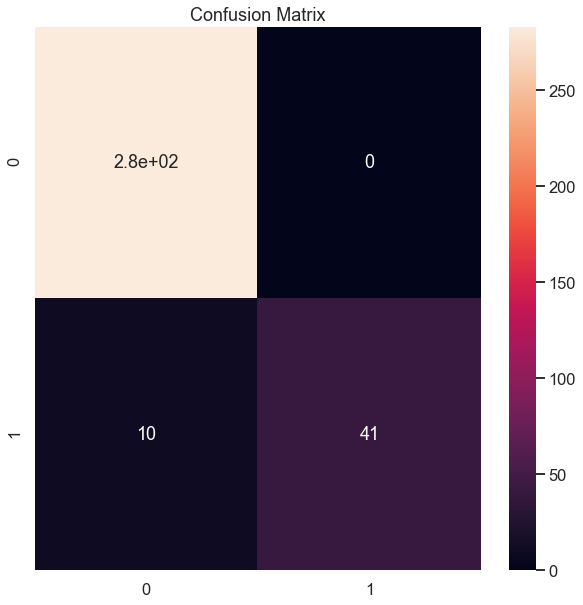

In [118]:
# Visualize Confusion Matrix for ada

model_cm(ada_best)

In [119]:
# Calculate ROC Score for ada

model_roc(ada_best)

Train Data ROC: 0.9398148148148149
Test Data ROC: 0.9019607843137255


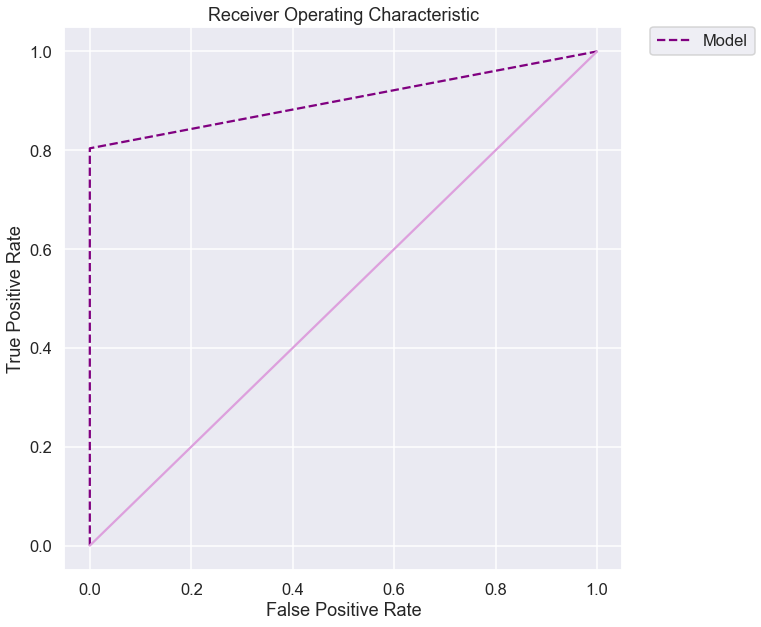

In [120]:
# Visualize ROC for ada

model_roc_curve(ada_best)

### Evaluation

ROC Score, 89.21%, is the highest of models so far (equal to Random Forest)

Precision is 100.00%.

F1 Score, 87.91%, is less-than the highest model so far(Random Forest: 88.17%).

<a id = 'gradient_boosting'></a>
## Gradient Boosting

In [121]:
# Define model

gb = GradientBoostingClassifier()

In [122]:
# Define gb parameters for Grid Search

gb_best = GradientBoostingClassifier(random_state = 13)

# Use Grid Search to find the best parameters for gb

gb_params = {'n_estimators' : [50, 100, 150],
             'learning_rate' : [0.01, 0.1, 1]}

model_grid(gb_best, gb_params)

{'learning_rate': 0.1, 'n_estimators': 150}

In [123]:
# Define best paramters for gb

gb_best = AdaBoostClassifier(random_state = 13,
                             n_estimators = 150,
                             learning_rate = 0.1)

In [124]:
# Fit and train gb using best parameters
# Calculate accuracy metric for gb
# Calculate precision, recall, and F1 metrics for gb

model_accuracy(gb_best)
model_report(gb_best)

Train Data Accuracy: 0.8752917639213071
Test Data Accuracy: 0.8682634730538922


,Train - False,Test - False,Train - True,Test - True
precision,0.886772,0.886731,0.676829,0.640000
recall,0.979353,0.968198,0.256944,0.313725
f1-score,0.930766,0.925676,0.372483,0.421053
support,2567.000000,283.000000,432.000000,51.000000


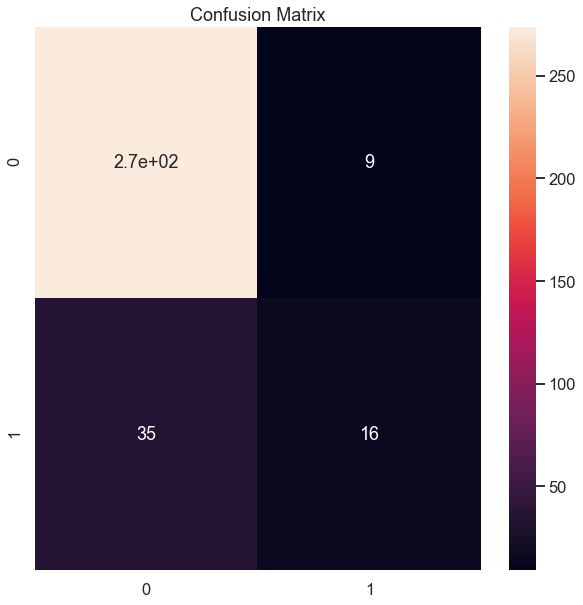

In [125]:
# Visualize Confusion Matrix for gb

model_cm(gb_best)

In [126]:
# Calculate ROC Score for gb

model_roc(gb_best)

Train Data ROC: 0.6181488875903562
Test Data ROC: 0.6409616850273678


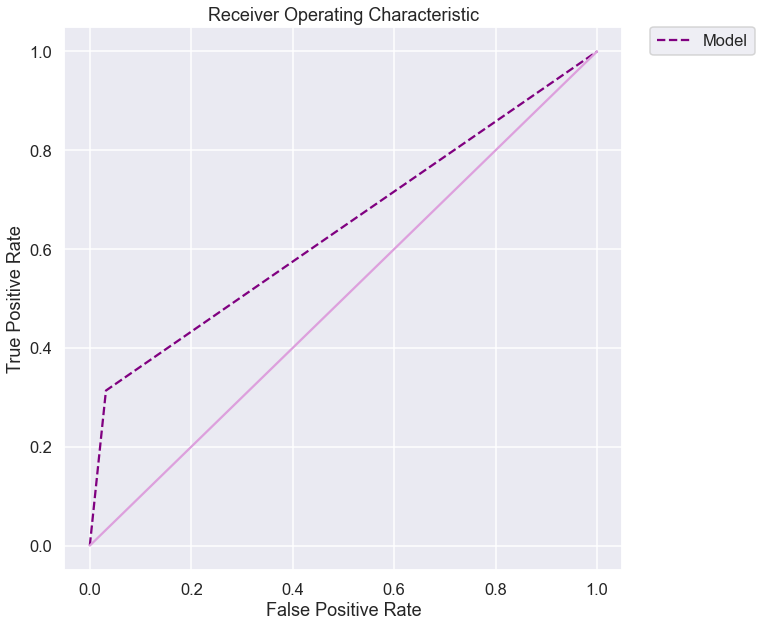

In [127]:
# Visualize ROC for gb

model_roc_curve(gb_best)

### Evaluation

ROC Score, 64.10%, is significantly less-than the highest model so far (Ada Boost: 90.19%).

Precision, 64.00%, is significantly less-than the highest models so far (Extra Tree, Random Forest, and Ada Boost: 100.00%).

<a id = 'xgboost'></a>
## XG Boost

In [128]:
#Define model

xgb1 = xgb.XGBClassifier()

In [129]:
# Define xgb parameters for Grid Search
# Use Grid Search to find the best parameters for xgb

xgb_params = {'eta' : [0.05, 0.1, 0.15],
             'max_depth' : [5, 10, 15],
             'subsample' : [0.5, 1],
             'objective' : ['binary:logistic', 'binary:logitraw', 'binary:hinge']}

model_grid(xgb1, xgb_params)

{'eta': 0.1, 'max_depth': 5, 'objective': 'binary:logistic', 'subsample': 1}

In [130]:
# Refine xgb parameters for Grid Search

xgb_best = xgb.XGBClassifier(eta = 0.1,
                             objective = 'binary:logistic',
                             subsample = 1)

xgb_params = {'max_depth' : [4, 5, 6]}

model_grid(xgb_best, xgb_params)

{'max_depth': 4}

In [131]:
# Define best paramters for xgb

xgb_best = xgb.XGBClassifier(eta = 0.1,
                             max_depth = 5,
                             objective = 'binary:logistic',
                             subsample = 1)

In [132]:
# Fit and train xgb using best parameters
# Calculate accuracy metric for xgb
# Calculate precision, recall, and F1 metrics for xgb

model_accuracy(xgb_best)
model_report(xgb_best)

Train Data Accuracy: 0.9789929976658887
Test Data Accuracy: 0.9700598802395209


,Train - False,Test - False,Train - True,Test - True
precision,0.976046,0.972318,1.000000,0.955556
recall,1.000000,0.992933,0.854167,0.843137
f1-score,0.987878,0.982517,0.921348,0.895833
support,2567.000000,283.000000,432.000000,51.000000


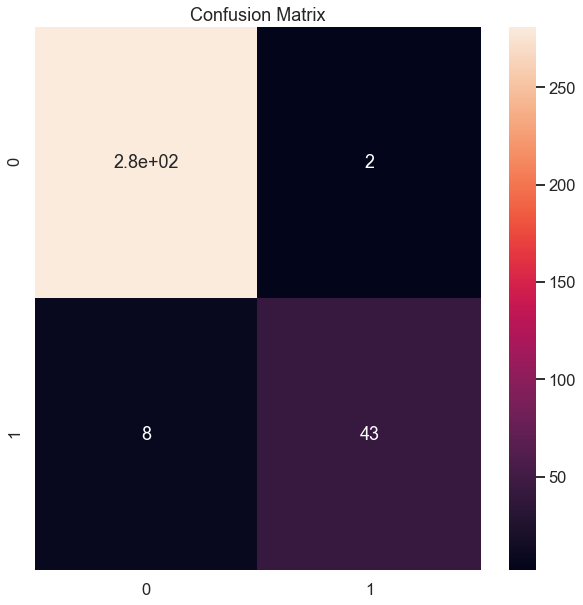

In [133]:
#Visualize Confusion Matrix for xgb

model_cm(xgb_best)

In [134]:
# Calculate ROC Score for xgb

model_roc(xgb_best)

Train Data ROC: 0.9270833333333333
Test Data ROC: 0.9180350585463868


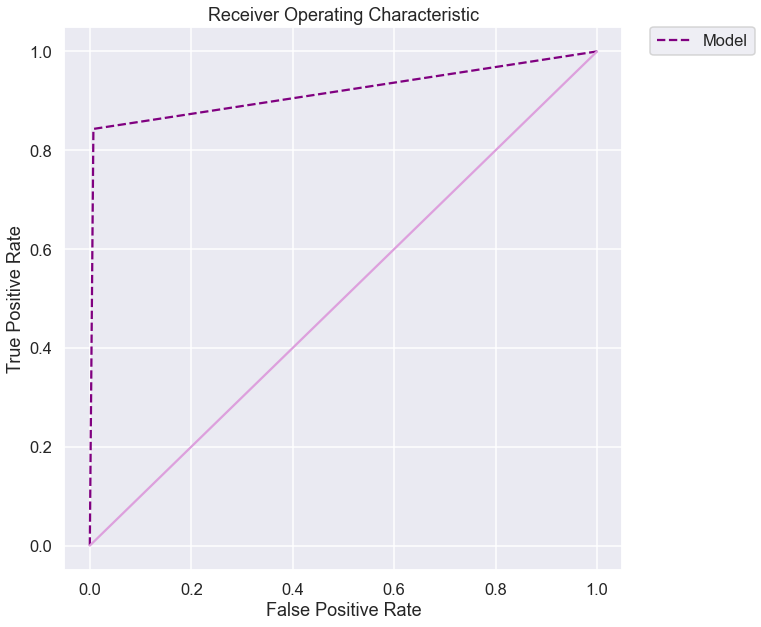

In [135]:
# Visualize ROC for xgb

model_roc_curve(xgb_best)

## Evaluation

ROC Score, 91.80%, is the highest of models so far.

Precision, 95.56% is less-than the highest models so far (Extra Tree, Random Forest, and Ada Boost: 100.00%).

F1 Score, 89.58%, is the highest of models so far.

<a id = 'modeling_conclusion'></a>
# Modeling Conclusion

**Based on the metrics calculated and the valuation of the metrics stated based on the business problem, XG Boost performed best of all of the models tested, with an ROC Score of 91.80%, Precision of 95.56%, and F1 Score of 89.58%.**

**Ada Boost performed similarly, with an ROC Score of 90.19%, Precision of 100.00%, and F1 Score, 89.13%.**

<a id = 'feature_importance'></a>
## Feature Importance

### Functions

In [136]:
# Visualize Feature Importance

def model_fi(model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    fi = (pd.DataFrame(model.feature_importances_,
                       index = x.columns, 
          columns = ['importance']).sort_values('importance',
                                                ascending = False))
    fig, ax = plt.subplots(figsize = (10, 20))
    sns.barplot(x = 'importance', y = x.columns, 
                data = fi, color = 'purple')
    ax.set_title('Feature Importance')
    plt.show()

<a id = 'feature_importance_xgb'></a>
### XGB Boost

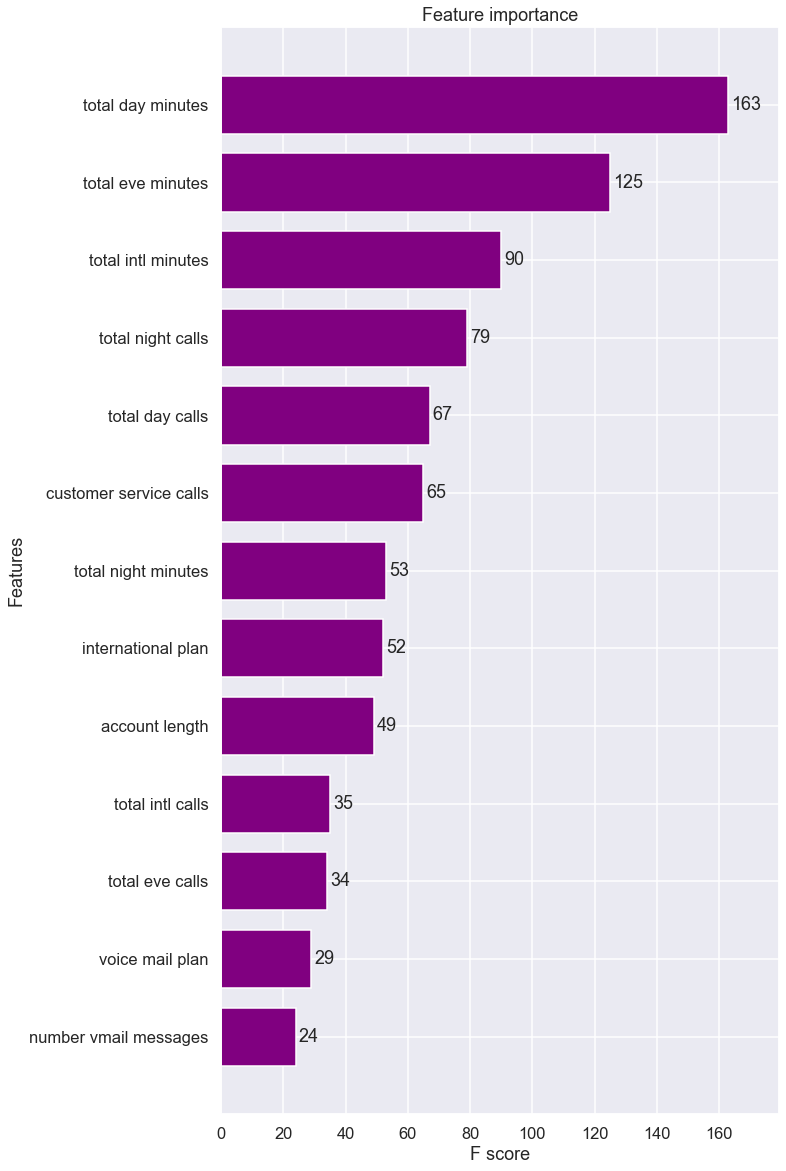

In [137]:
# Calculate and visualize the Feature Importance for the XGB Boost model

model_xgb = xgb.XGBClassifier(eta = 0.1,
                             max_depth = 5,
                             objective = 'binary:logistic',
                             subsample = 1)

model_xgb.fit(x_test, y_test)

fig, ax = plt.subplots(figsize = (10, 20))
xgb.plot_importance(model_xgb, ax = ax, color = 'purple', height = 0.75)
plt.show()

<a id = 'feature_importance_ada'></a>
### Ada Boost

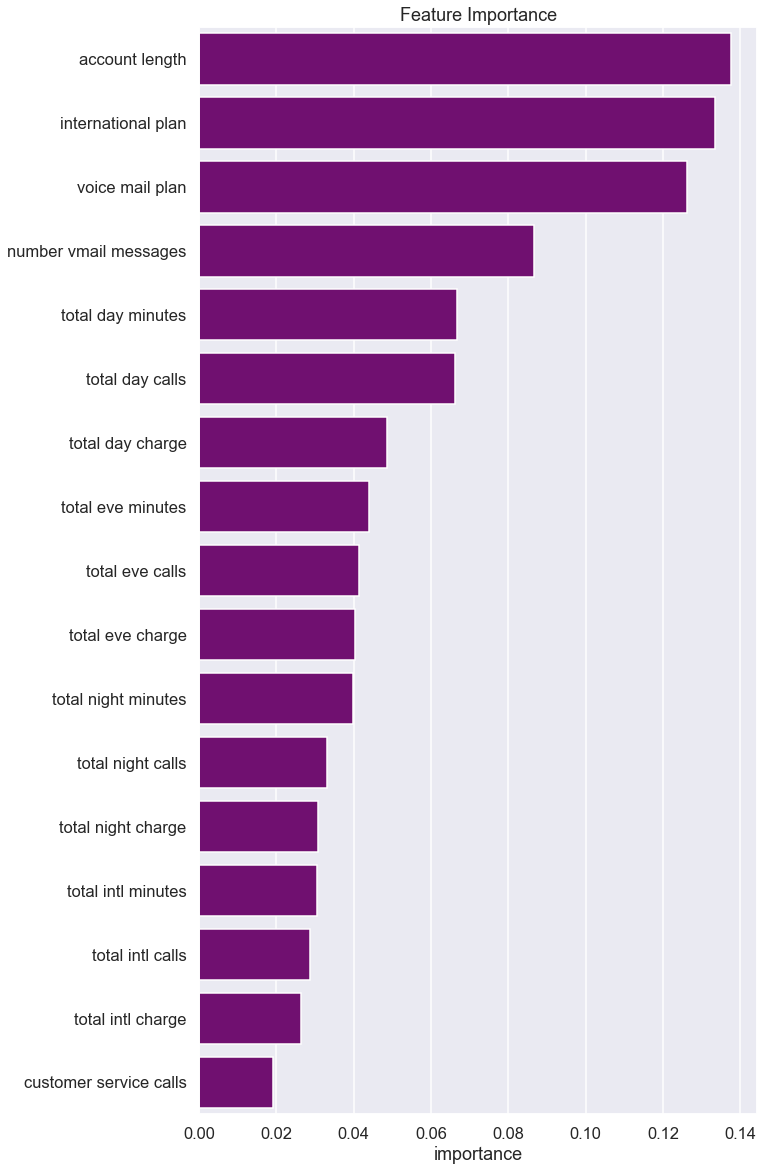

In [138]:
# Calculate and visualize the feature importance for the Ada Boosting Model

model_fi(ada_best)

<a id = 'additional_data_transformation'></a>
## Explore Additional Data Transformation

<a id = 'additional_data_transformation_xgb'></a>
### XG Boost

In [139]:
# Drop total international calls and total evening calls due to lowest feature importance

x_xgb = x.drop(['total intl calls', 'total eve calls'], axis = 1)

x_xgb_train, x_xgb_test = train_test_split(x_xgb, test_size = 0.1,
                                           random_state = 13)

# Refit and train xgb using best parameters
# Calculate accuracy metric for xgb
# Calculate precision, recall, and F1 metrics for xgb

model_xgb = xgb.XGBClassifier(eta = 0.1,
                             max_depth = 5,
                             objective = 'binary:logistic',
                             subsample = 1)

model_xgb.fit(x_xgb_train, y_train)

predictions_xgb_train = model_xgb.predict(x_xgb_train)
predictions_xgb_test = model_xgb.predict(x_xgb_test)
    
report_xgb_train = classification_report(y_train,
                                         predictions_xgb_train,
                                         output_dict = True)
report_xgb_test = classification_report(y_test,
                                    predictions_xgb_test,
                                    output_dict = True)
    
report_xgb_df = (pd.DataFrame(report_xgb_train))
report_xgb_df = report_xgb_df.rename(columns = {'0' : 'Train - False',
                                                '1' : 'Train - True'})
report_xgb_df = report_xgb_df.drop(['accuracy', 'macro avg', 'weighted avg'],
                                   axis = 1)
report_xgb_test_df = (pd.DataFrame(report_xgb_test))
report_xgb_df['Test - False'] = report_xgb_test_df['0']
report_xgb_df['Test - True'] = report_xgb_test_df['1']
report_xgb_df = report_xgb_df[['Train - False',
                               'Test - False',
                               'Train - True',
                               'Test - True']]

roc_xgb_train = roc_auc_score(y_train, predictions_xgb_train)
roc_xgb_test = roc_auc_score(y_test, predictions_xgb_test)

display(report_xgb_df)
print('Train Data ROC:', roc_xgb_train)
print('Test Data ROC:', roc_xgb_test)

,Train - False,Test - False,Train - True,Test - True
precision,0.968667,0.952542,0.997143,0.948718
recall,0.999610,0.992933,0.807870,0.725490
f1-score,0.983896,0.972318,0.892583,0.822222
support,2567.000000,283.000000,432.000000,51.000000


Train Data ROC: 0.9037404052864707
Test Data ROC: 0.8592115291346221


**Evaluation**

ROC decreased to 85.92% from 91.80%.

Precision decreased to 94.87% from 95.56%.

Due to the metrics worsening as a result of the additional data transformation, the changes will be discarded.

<a id = 'additional_data_transformation_ada'></a>
### Ada Boost

In [140]:
# Drop total international calls and total evening calls due to lowest feature importance

x_ada = x.drop(['total intl calls', 'total intl charge', 'customer service calls'], axis = 1)

x_ada_train, x_ada_test = train_test_split(x_ada, test_size = 0.1,
                                           random_state = 13)

# Refit and train ada using best parameters
# Calculate accuracy metric for ada
# Calculate precision, recall, and F1 metrics for ada

model_ada = AdaBoostClassifier(base_estimator = rf_best,
                               random_state = 13,
                               n_estimators = 2,
                               learning_rate = 1)

model_ada.fit(x_ada_train, y_train)

predictions_ada_train = model_ada.predict(x_ada_train)
predictions_ada_test = model_ada.predict(x_ada_test)
    
report_ada_train = classification_report(y_train,
                                         predictions_ada_train,
                                         output_dict = True)
report_ada_test = classification_report(y_test,
                                        predictions_ada_test,
                                        output_dict = True)
    
report_ada_df = (pd.DataFrame(report_ada_train))
report_ada_df = report_ada_df.rename(columns = {'0' : 'Train - False',
                                                '1' : 'Train - True'})
report_ada_df = report_ada_df.drop(['accuracy', 'macro avg', 'weighted avg'],
                                   axis = 1)
report_ada_test_df = (pd.DataFrame(report_ada_test))
report_ada_df['Test - False'] = report_ada_test_df['0']
report_ada_df['Test - True'] = report_ada_test_df['1']
report_ada_df = report_ada_df[['Train - False',
                               'Test - False',
                               'Train - True',
                               'Test - True']]

roc_ada_train = roc_auc_score(y_train, predictions_ada_train)
roc_ada_test = roc_auc_score(y_test, predictions_ada_test)

display(report_ada_df)
print('Train Data ROC:', roc_ada_train)
print('Test Data ROC:', roc_ada_test)

,Train - False,Test - False,Train - True,Test - True
precision,0.996120,0.924837,1.000000,1.000000
recall,1.000000,1.000000,0.976852,0.549020
f1-score,0.998056,0.960951,0.988290,0.708861
support,2567.000000,283.000000,432.000000,51.000000


Train Data ROC: 0.9884259259259259
Test Data ROC: 0.7745098039215687


**Evaluation**

ROC increased to 98.84% from 90.19%.

Precision decreased to 96.43% from 100.00%.

F1 Score decreased to 68.35% from 89.13%.

Due to the metrics worsening as a result of the additional data transformation, the changes will be discarded.

<a id = 'conclusions'></a>
# Conclusions

<a id = 'conclusion_minutes'></a>
## Minutes

Feature Importance indicates the most most significant features toward predicting customer churn are the features associated with minutes used by the customer, with the top three overall features being:
* Daytime Minutes
* Evening Minutes
* International Minutes

The visualization for Churn by Daytime Minutes indicates a skew churn toward the higher number of daytime minutes used.

This poses the question, is there a factor regarding the service which is negatively impacting customers who use more daytime minutes?  
Possible factors may be:
* General quality of service in the area
* Areas of lower quality
* Decreased quality at high use times during the day

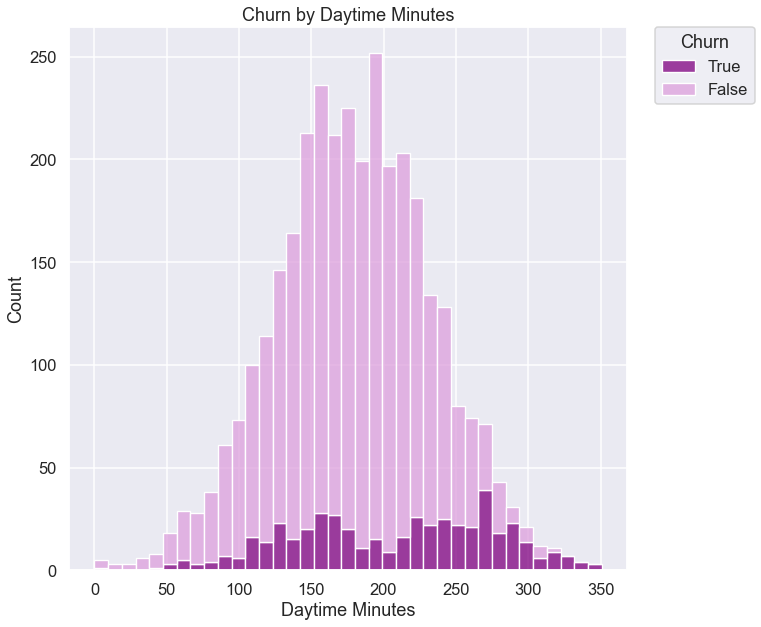

In [141]:
int_feature_v_churn('total day minutes',
                   'Churn by Daytime Minutes',
                   'Daytime Minutes')

<a id = 'conclusions_customer_service_calls'></a>
## Customer Service Calls

The next most important feature not associated with minutes used (or, closely associated, number of calls) is Customer Service Calls.

The visual for Churn by Customer Service Calls indicates a skew for churn toward customer with greater than three customer service calls.

Further investigation reveals 51.68% of customers with greater than three customer service calls churn v 11.25% of customers with three or less.  

This poses questions such as:
* What are the questions and/or issues customers are calling about?
* Can the individual questions and/or issues be resolved to a more satisfactory level (within reason of the overall business-model) so as to retain customers?
* Are there recurring questions and/or issues across customer service calls which can be addresses at a macro-level?
* Are customers satisfied with their interactions with customer service; what is customers' perception of the quality of customer service?

In [142]:
# Calculate the percentage of customer who churn, 
# who do not have more than three customer service calls
# and who do not have three or less customer service calls

cit_cs_gt = cit.where(cit['customer service calls'] > 3)
cit_cs_lt = cit.where(cit['customer service calls'] < 4)

churn_cs_gt = (cit_cs_gt['churn'] == 1).sum()
churn_cs_lt = (cit_cs_lt['churn'] == 1).sum()

percent_churn_gt = churn_cs_gt / (cit['customer service calls']
                                  > 3).sum()
percent_churn_lt = churn_cs_lt / (cit['customer service calls']
                                  <= 3).sum()

print('Percentage of Customers with > 3 Customer Service Calls who Churn',
      '\n', (100 * percent_churn_gt).round(2), '\n')
print('Percentage of Customers with <= Customer Service Calls who Churn',
      '\n', (100 * percent_churn_lt).round(2))

Percentage of Customers with > 3 Customer Service Calls who Churn 
 51.69 

Percentage of Customers with <= Customer Service Calls who Churn 
 11.25


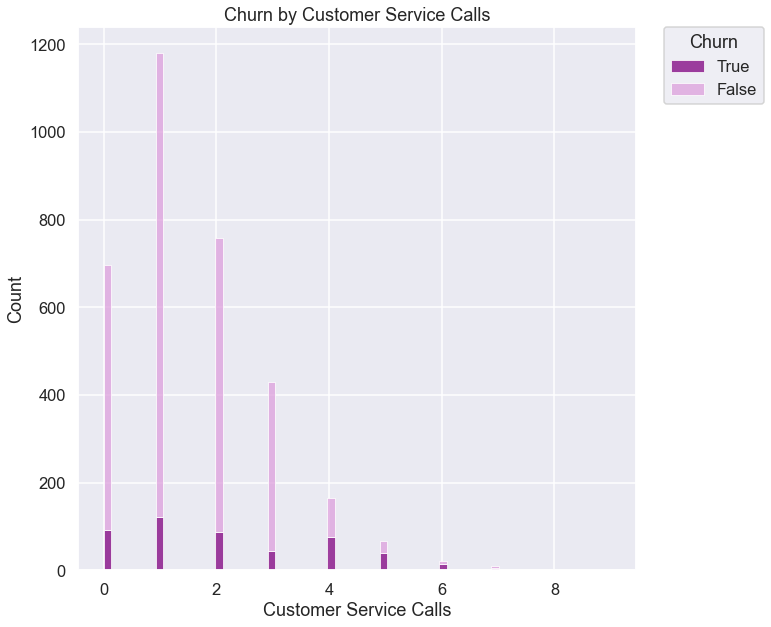

In [143]:
int_feature_v_churn('customer service calls',
                   'Churn by Customer Service Calls',
                   'Customer Service Calls')

<a id = 'conclusions_voicemails'></a>
## Voicemails

The next most important feature after Customer Service Calls is Number of Voicemail messages.

The visual for Churn by Number of Voicemail Messages indicates a much higher churn rate amongst customers with zero voicemails, which is consistent with Churn by Voicemail Mail, which indicates a significantly higher rate of churn amongst customers without a voicemail plan (who would therefore have zero voicemails).

Further investigation reveals 83.44% of customers who churn do not have a voicemail plan.  

This poses the questions:
* Are customers aware of the voicemail plan?
* Are sales associates educating customers about the voicemail plan and encouraging it?

In [144]:
# Calculate the percentage of customer who churn, who do not have a voicemail plan

cit_churn = cit.where(cit['churn'] == 1)
churn_vmail = (cit_churn['voice mail plan'] == 0).sum()

print('Percentage of Customer who Churn without Voicemail Plan',
      '\n', (100 * churn_vmail / churn).round(2))

Percentage of Customer who Churn without Voicemail Plan 
 83.44


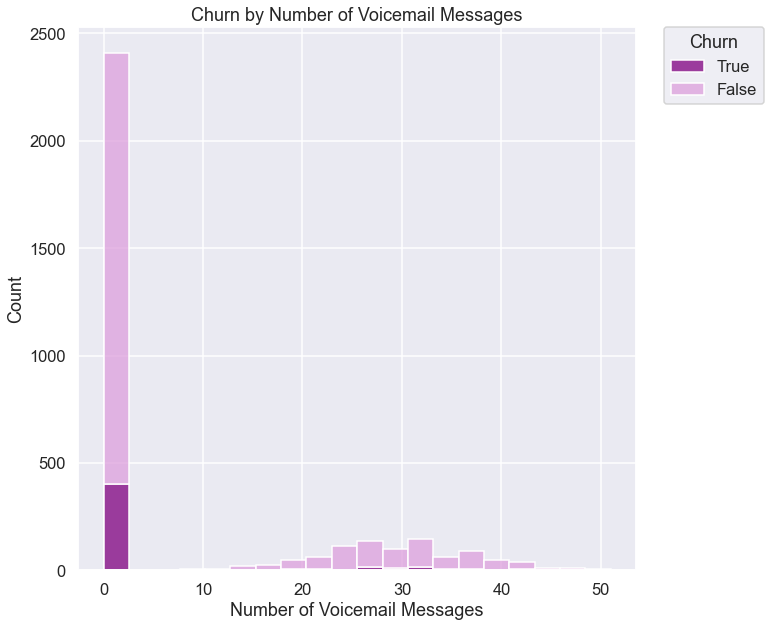

In [145]:
int_feature_v_churn('number vmail messages',
                   'Churn by Number of Voicemail Messages',
                   'Number of Voicemail Messages')

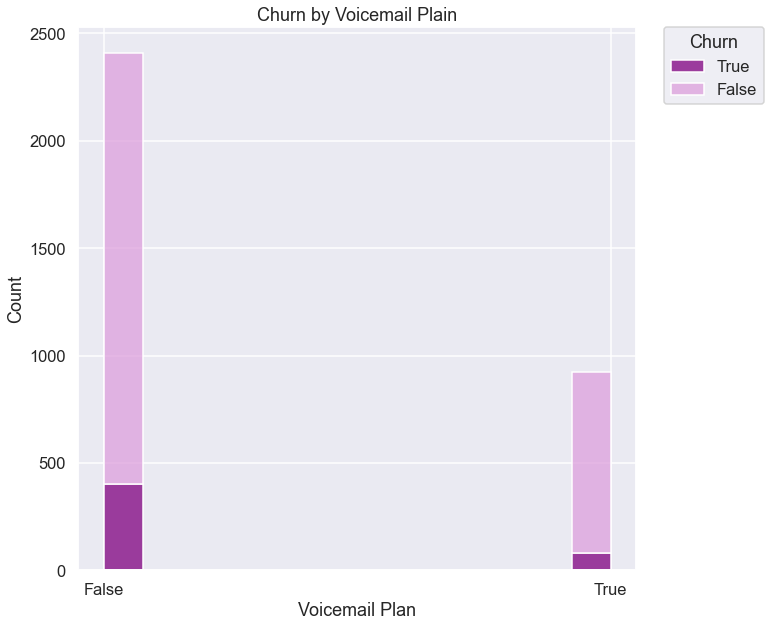

In [146]:
category_feature_v_churn('voice mail plan',
                        'Churn by Voicemail Plain',
                        'Voicemail Plan')

<a id = 'next_steps'></a>
# Next Steps

Following the findings of this investigation analyzing data associated with telecommunications customers in the San Francisco Bay area and predicting churn using classification modeling, the next steps towards further enhancing San Bay Tel's retention while they establish themselves in the market and limiting the likelihood of customer churn, would be:

**Further Modeling**

The most important features toward predicting churn were all associated with minutes, which is a continuous, numerical data type. 

Other modeling types beyond classification models, may help provide further insight toward better predicting churn.

**Customer Polling**

Many of the questions posed in the conclusions can be further explored through targeted polling of customer most likely to churn.

Then further analysis and modelling can be done with the resulting data.

**Investigation of Service Quality**

An investigation may be warranted into the quality of service, due to customers with higher number of minutes used having a higher churn rate.

Rating factors such as connection strength by geographic location, connection strength by time of day, etc.,  can then be modelled against churn rate.

**Logging of Customer Service Call Topic**

Logging the topics of customer service calls may be warranted.

The resulting data can then be modeled against churn and other factors associated with the topic.